In [725]:

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [726]:
# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

In [727]:
def generate_a_drawing(figsize, U, V, noise=0.0):#画图
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)#画子图（1行1列第一个位置）
    plt.axis('Off')#Turn off axis lines and labels
    ax.set_xlim(0,figsize)#设置x的范围（xlimit）
    ax.set_ylim(0,figsize)#设置y的范围（ylimit）
    ax.fill(U, V, "k")#给出节点坐标和颜色(黑色)
    fig.canvas.draw()#生成事件的FigureCanvas实例？
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    #此函数将缓冲区解释为一维数组。 暴露缓冲区接口的任何对象都用作参数来返回ndarray
    #numpy.frombuffer(buffer, dtype = float, count = -1, offset = 0)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)#关闭所有fig
    return imdata

In [728]:
def generate_a_rectangle(noise=0.0, free_location=False):#生成一个四边形
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)

In [729]:
def generate_a_disk(noise=0.0, free_location=False):#生成一个圆
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

In [730]:
def generate_a_triangle(noise=0.0, free_location=False):#生成一个三角形
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

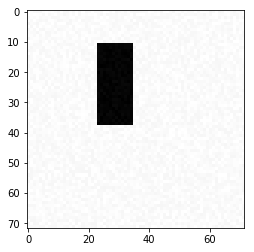

In [731]:
im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

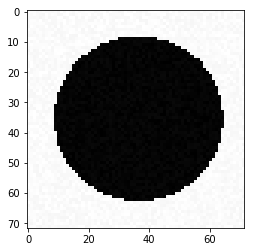

In [732]:
im = generate_a_disk(10)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

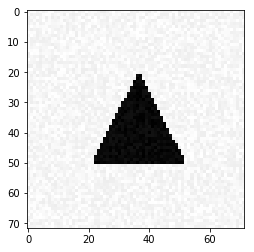

In [733]:
[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

In [734]:
def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):#生成的x是图形，y是标签
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category#0是rectangle，1是disk，2是triangle
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

In [735]:
def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

In [736]:
def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

In [737]:
import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

In [738]:
def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]

In [739]:
from keras.models import Sequential
from keras.layers import Dense, Activation
#from keras.utils.visualize_util import plot
from keras.utils.np_utils import to_categorical

import  numpy as np
import  matplotlib.pyplot as plt

import  sklearn
from    sklearn import datasets, linear_model
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [740]:
[X_train, Y_train] = generate_dataset_classification(300, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [741]:
(train_images, train_labels)= [X_train, Y_train]
#for i in range (len(train_labels)):
#    if train_labels(i) == 0:
#        print (train_labels(i))
#        train_labels(i) = 'rectangle
    

In [742]:
#for i in range (len(train_images[1])):
#    train_images[1][i] = 1
#    int(train_images[1][i])
    

In [743]:
#class_names = [ 'rectangle', 'disk', 'triangle']
class_names = [ 0, 1, 2]

In [744]:
Y_train.shape

(300,)

In [745]:
train_images.shape

(300, 5184)

In [746]:
len(train_labels)

300

In [747]:
train_labels

array([2., 1., 2., 2., 2., 1., 2., 2., 0., 2., 0., 1., 0., 2., 0., 1., 0.,
       2., 2., 1., 0., 1., 0., 1., 0., 2., 2., 0., 0., 2., 0., 1., 0., 0.,
       1., 1., 2., 1., 0., 1., 1., 1., 1., 2., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 2.,
       0., 2., 1., 0., 2., 2., 2., 2., 1., 0., 2., 1., 1., 0., 1., 2., 1.,
       2., 1., 2., 2., 1., 1., 2., 1., 1., 0., 1., 0., 1., 1., 2., 1., 0.,
       0., 2., 1., 1., 2., 1., 0., 2., 0., 0., 2., 1., 0., 0., 2., 0., 2.,
       2., 1., 0., 0., 2., 0., 2., 0., 1., 2., 2., 0., 0., 1., 2., 2., 0.,
       0., 1., 2., 2., 1., 2., 2., 0., 1., 1., 1., 1., 1., 2., 2., 2., 0.,
       2., 0., 1., 0., 1., 1., 2., 0., 1., 1., 2., 1., 1., 1., 2., 0., 1.,
       2., 2., 1., 1., 0., 1., 1., 0., 1., 0., 1., 2., 2., 2., 0., 0., 0.,
       2., 1., 0., 2., 2., 1., 2., 0., 0., 2., 2., 1., 2., 2., 0., 1., 2.,
       2., 2., 0., 2., 2., 0., 0., 1., 0., 0., 2., 2., 1., 0., 1., 2., 0.,
       0., 2., 1., 0., 0.

In [748]:
train_images[1].shape

(5184,)

In [749]:
train_images[1]

array([0.97786321, 0.99943332, 0.93987897, ..., 0.97913101, 0.95940747,
       0.94246484])

In [750]:
train_img = np.zeros((300,72,72))
for i in range (300):
    train_img[i] = np.reshape(train_images[i],(72,72))

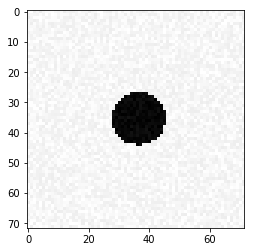

In [751]:
plt.imshow(train_img[1], cmap='gray')

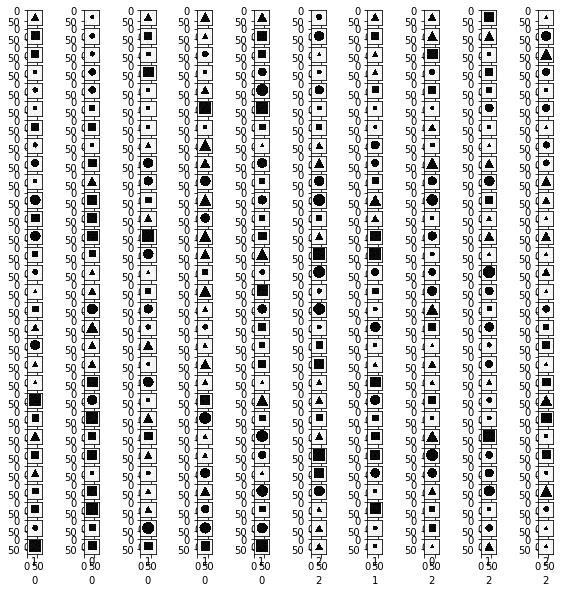

In [752]:
plt.figure(figsize=(10,10))
for i in range(300):
    plt.subplot(30,10,i+1)
    img = train_images[i]
    #plt.xticks([])
    #plt.yticks([])
    #plt.grid(False)
    plt.imshow(np.reshape(train_images[i],(72,72)), cmap='gray')
    plt.xlabel(class_names[int(train_labels[i])])

In [753]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(72,72)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(3, activation=tf.nn.softmax)
])


In [754]:
#SGD
model.compile(optimizer=keras.optimizers.SGD(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [755]:
model.fit(train_img, train_labels, epochs=5)

Epoch 1/5
300/300 [==============================] - 1s 4ms/step - loss: 2.2419 - acc: 0.3933
Epoch 2/5
300/300 [==============================] - 0s 453us/step - loss: 0.9606 - acc: 0.4900
Epoch 3/5
300/300 [==============================] - 0s 456us/step - loss: 0.8820 - acc: 0.5767
Epoch 4/5
300/300 [==============================] - 0s 443us/step - loss: 0.8899 - acc: 0.5933
Epoch 5/5
300/300 [==============================] - 0s 436us/step - loss: 0.8512 - acc: 0.6067


In [756]:
#Adam
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [757]:
model.fit(train_img, train_labels, epochs=5)

Epoch 1/5
300/300 [==============================] - 1s 5ms/step - loss: 0.8700 - acc: 0.5767
Epoch 2/5
300/300 [==============================] - 0s 420us/step - loss: 0.5934 - acc: 0.7433
Epoch 3/5
300/300 [==============================] - 0s 430us/step - loss: 0.5369 - acc: 0.6900
Epoch 4/5
300/300 [==============================] - 0s 393us/step - loss: 0.4560 - acc: 0.8700
Epoch 5/5
300/300 [==============================] - 0s 383us/step - loss: 0.4301 - acc: 0.8100


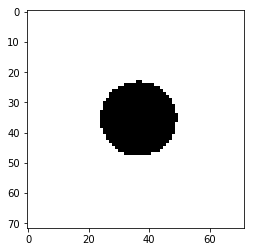

In [758]:
#check the classifier
X_test = generate_a_disk()
#X_test = X_test.reshape(1, X_test.shape[0])
X_test = np.reshape(X_test,(72,72))
plt.imshow(X_test, cmap='gray')

In [759]:
X_test = np.reshape(X_test,(1,72,72))
X_test.shape

(1, 72, 72)

In [760]:
model.predict(X_test)
#('rectangle', 'disk', 'triangle')

array([[1.030994e-11, 1.000000e+00, 0.000000e+00]], dtype=float32)

In [761]:
#4 Visualization of the Solution
weight = model.get_weights()
weight

[array([[-0.01621225, -0.02631147, -0.01253747, ..., -0.00113374,
         -0.02283527, -0.01380466],
        [ 0.03150975, -0.02719417,  0.0126951 , ...,  0.03135971,
          0.01196764,  0.0250935 ],
        [ 0.00477463, -0.02985758, -0.01026283, ...,  0.0142348 ,
         -0.03393552,  0.02900502],
        ...,
        [ 0.00469498,  0.00912233, -0.01421789, ...,  0.00449627,
         -0.0191448 , -0.02592073],
        [ 0.01047584, -0.01233117, -0.02821367, ...,  0.00234018,
          0.02313117,  0.01828634],
        [ 0.02965301, -0.02641378, -0.01794269, ..., -0.02546016,
          0.00343831, -0.02675424]], dtype=float32),
 array([-1.2765769e-03, -8.0616958e-04,  0.0000000e+00, -6.7304081e-04,
         0.0000000e+00,  2.5348247e-03, -9.4266172e-04, -3.1327931e-04,
        -1.1318703e-03, -8.2531892e-04,  0.0000000e+00, -5.9637125e-04,
        -6.0451333e-04,  1.5844281e-03,  0.0000000e+00,  0.0000000e+00,
        -4.4747620e-04, -5.4029142e-03,  0.0000000e+00, -5.3656957e-04

In [762]:
weight[0][:,0].shape

(5184,)

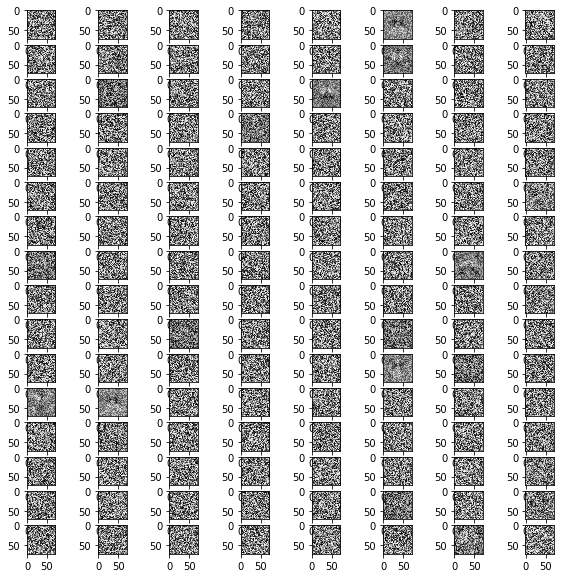

In [763]:
plt.figure(figsize=(10,10))
for i in range(128):
    plt.subplot(16,8,i+1)
    #img = weight[0][:,i]
    #plt.xticks([])
    #plt.yticks([])
    #plt.grid(False)
    plt.imshow(np.reshape(weight[0][:,i],(72,72)), cmap='gray')

In [764]:
#5 A More Difficult Classification Problem
[X_train, Y_train] = generate_dataset_classification(300, 20, True)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [765]:
from keras import utils as np_utils
[X_test, Y_test] = generate_test_set_classification()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [766]:
test_img = np.zeros((300,72,72))
for i in range (300):
    test_img[i] = np.reshape(X_test[i],(72,72))

In [767]:
Y_test[1][1]

0.0

In [768]:
test_labels = np.zeros((300))
for i in range (300):
    if Y_test[i][0] == 1:
        test_labels[i] = 0
    elif Y_test[i][1] == 1:
        test_labels[i] = 1
    else:
        test_labels[i] = 2

In [769]:
test_labels

array([1., 2., 1., 0., 1., 1., 2., 0., 2., 0., 2., 1., 2., 2., 2., 1., 1.,
       1., 2., 0., 2., 0., 0., 1., 0., 1., 0., 1., 2., 1., 1., 2., 2., 1.,
       1., 0., 0., 0., 2., 1., 2., 1., 0., 0., 0., 1., 1., 0., 0., 2., 2.,
       1., 1., 0., 0., 0., 1., 1., 1., 0., 2., 1., 1., 1., 1., 0., 2., 2.,
       0., 1., 2., 1., 0., 2., 2., 0., 2., 0., 2., 0., 0., 0., 1., 1., 1.,
       2., 1., 2., 2., 0., 1., 2., 0., 1., 0., 2., 0., 0., 0., 2., 2., 1.,
       0., 0., 1., 2., 1., 2., 1., 2., 2., 0., 0., 0., 2., 2., 2., 0., 1.,
       2., 0., 0., 1., 2., 0., 1., 0., 0., 2., 0., 0., 1., 2., 2., 2., 0.,
       1., 2., 0., 2., 2., 2., 1., 0., 0., 0., 1., 1., 1., 0., 2., 1., 2.,
       2., 2., 1., 0., 2., 0., 1., 1., 1., 0., 0., 2., 0., 2., 1., 2., 0.,
       0., 2., 1., 1., 0., 1., 2., 0., 2., 1., 1., 1., 1., 0., 1., 1., 2.,
       0., 2., 0., 0., 2., 0., 2., 0., 1., 0., 2., 2., 2., 1., 2., 1., 2.,
       2., 0., 2., 1., 0., 2., 0., 0., 0., 1., 2., 0., 0., 0., 0., 0., 1.,
       2., 1., 2., 1., 0.

In [770]:
model.evaluate(test_img, test_labels)
#model.evaluate(np.reshape(X_test,(300,72,72)), Y_test[:,0])
#model.evaluate(np.reshape(X_test,(300,72,72)), Y_test[:,1])
#model.evaluate(np.reshape(X_test,(300,72,72)), Y_test[:,2])

300/300 [==============================] - 0s 1ms/step


[1.8565266259511313, 0.3233333337306976]

In [771]:
#6 A Regression Problem
[X_train, Y_train] = generate_dataset_regression(300, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


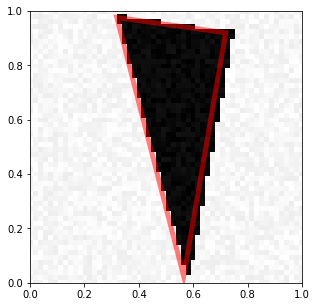

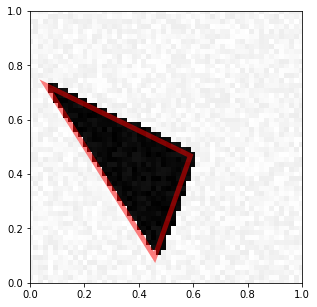

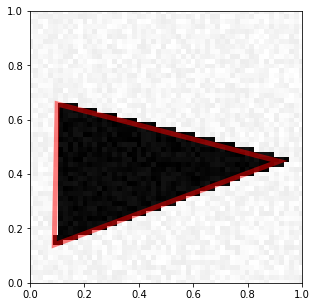

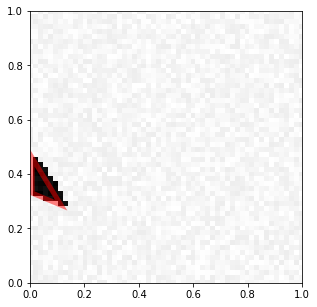

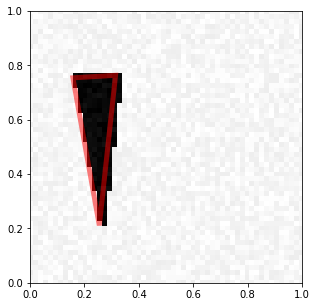

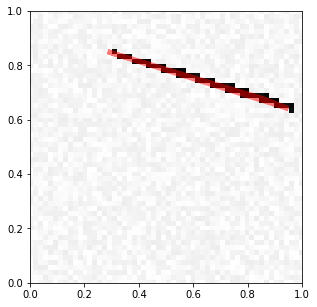

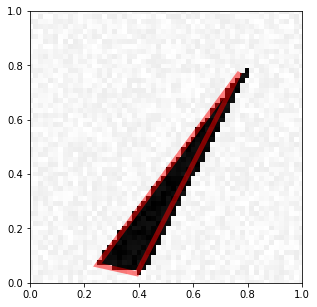

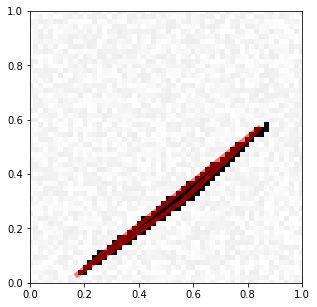

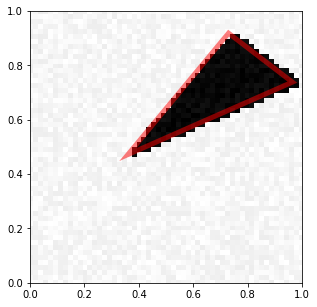

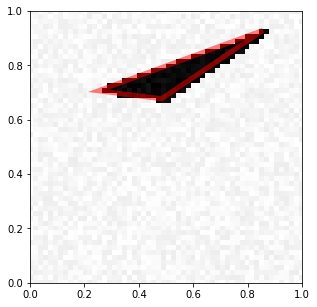

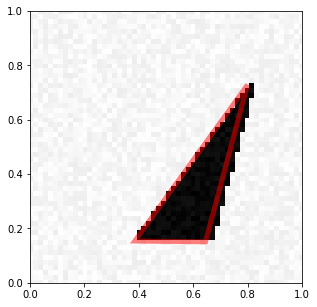

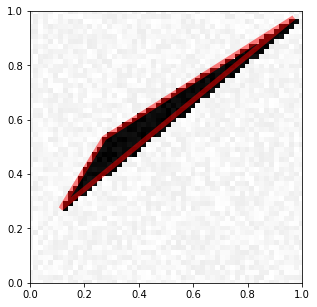

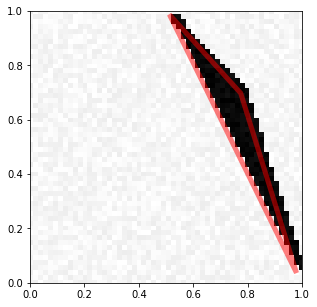

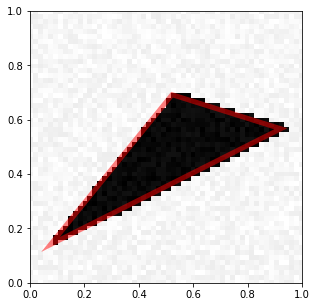

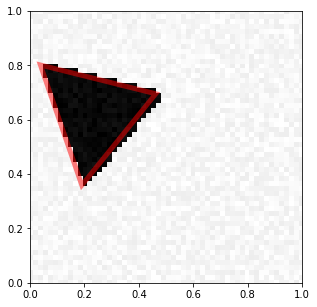

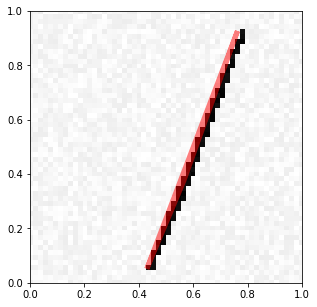

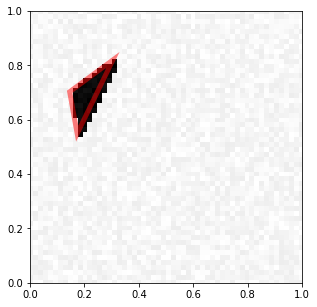

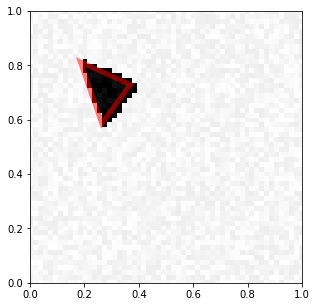

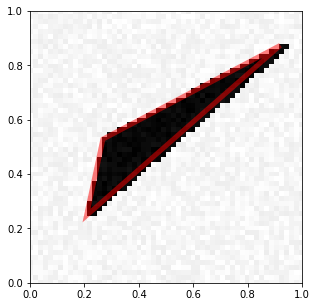

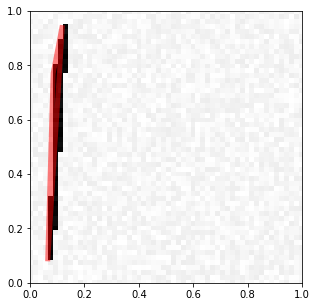

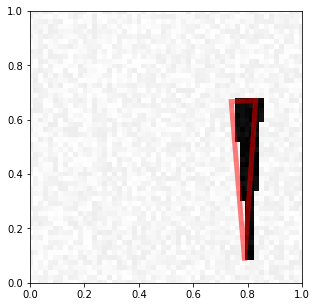

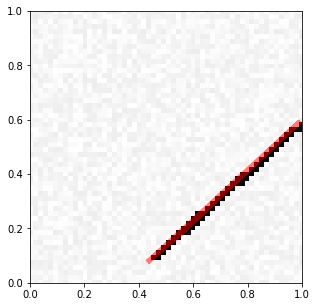

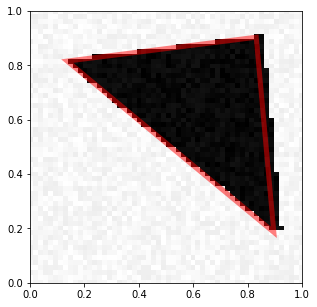

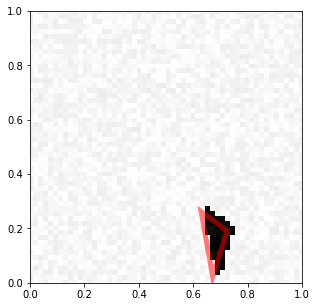

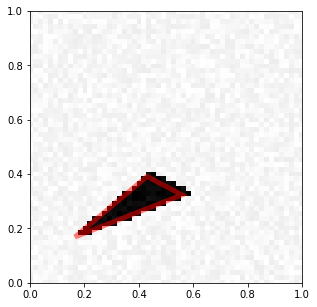

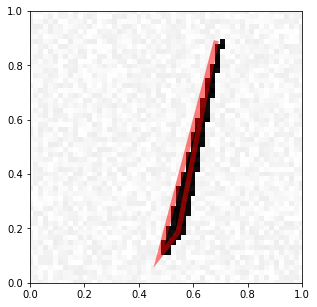

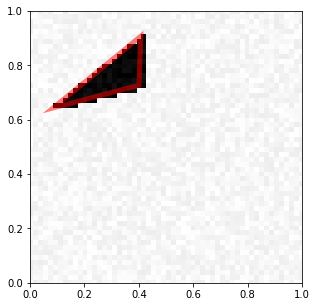

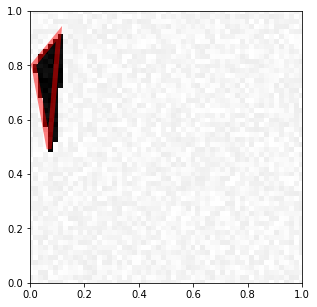

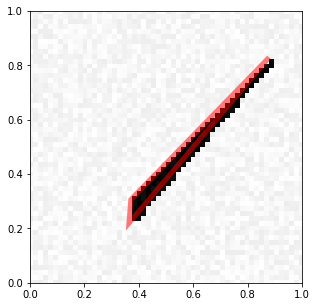

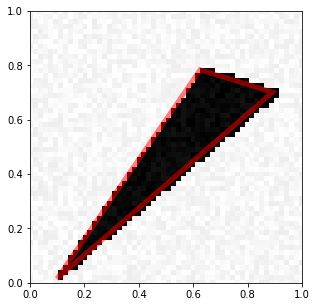

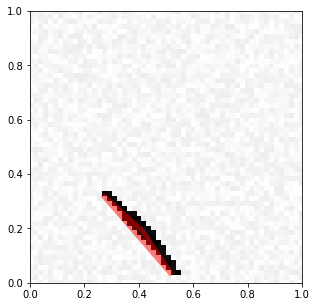

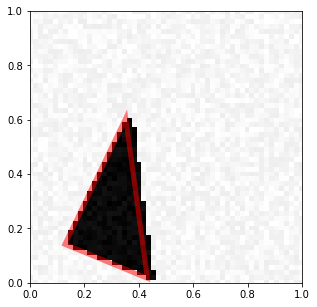

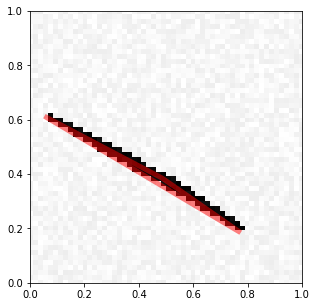

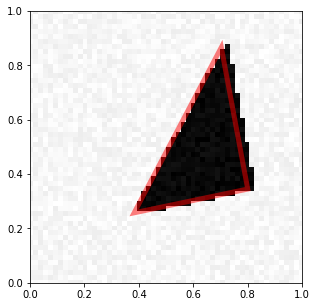

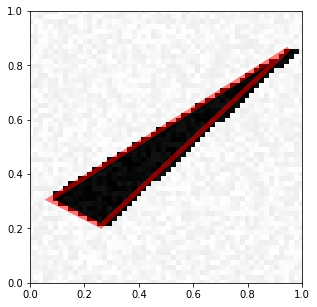

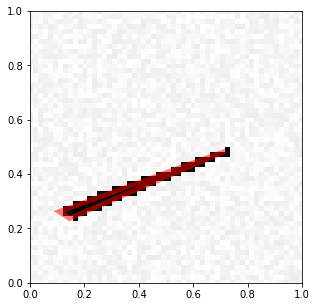

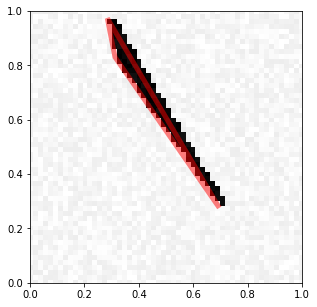

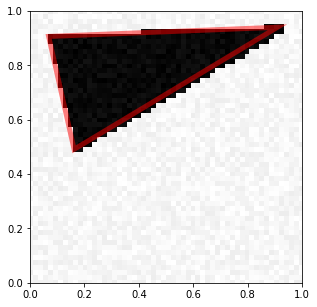

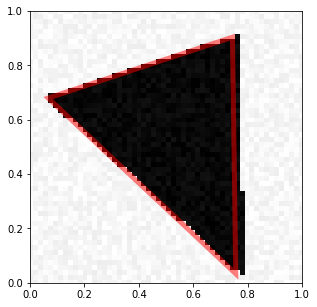

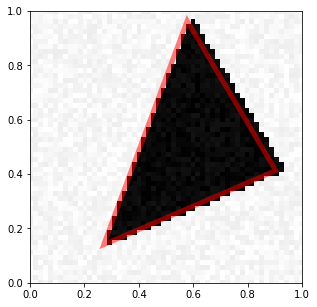

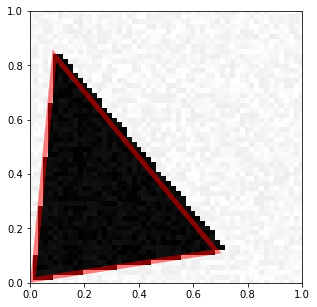

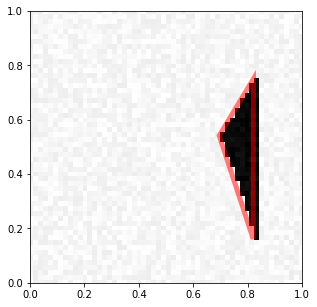

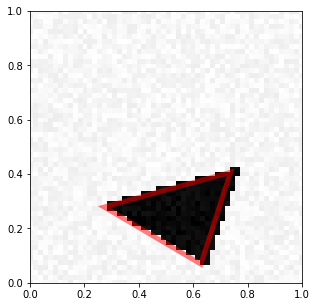

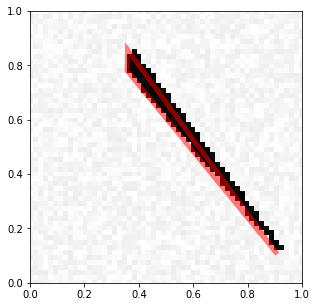

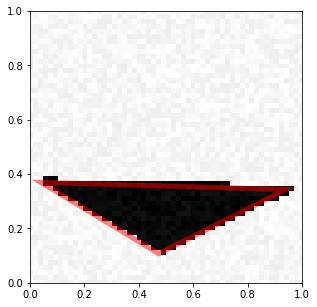

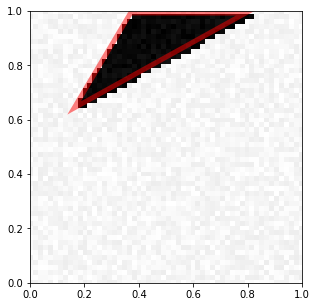

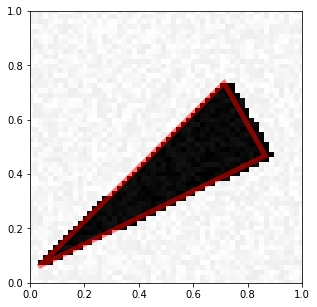

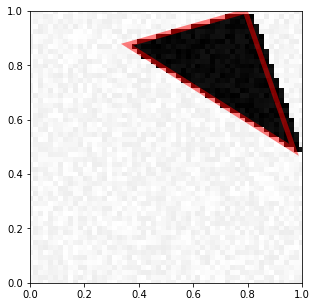

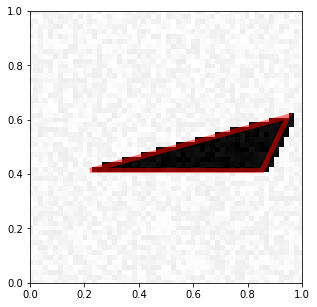

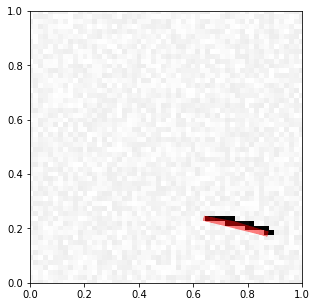

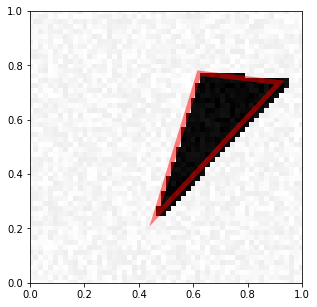

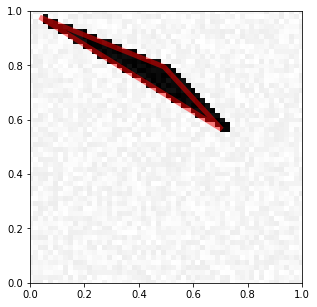

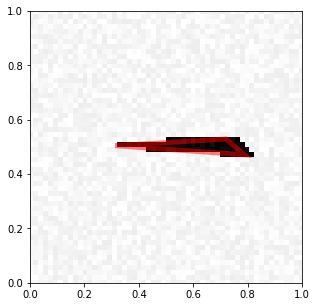

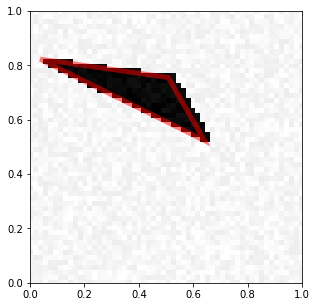

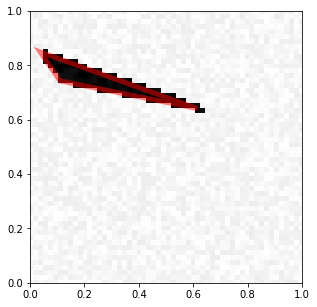

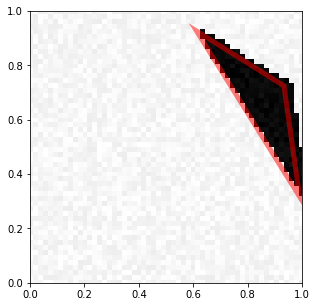

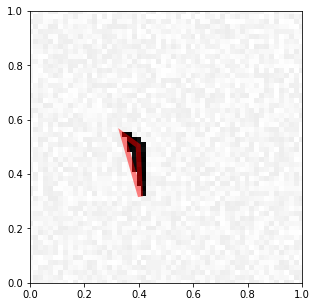

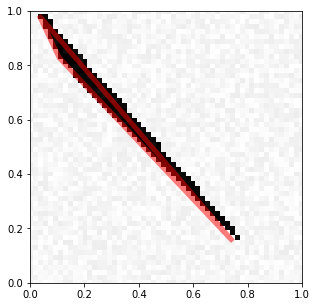

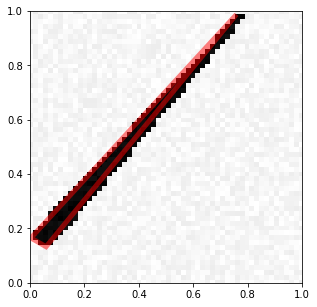

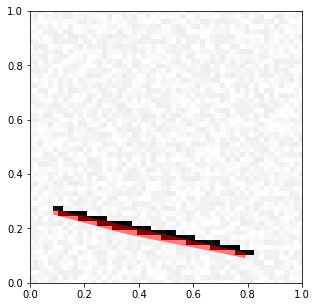

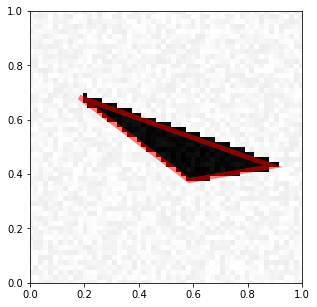

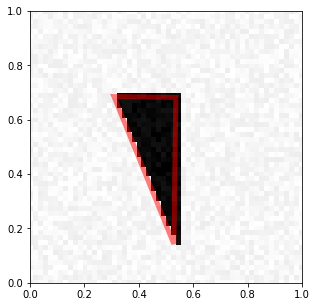

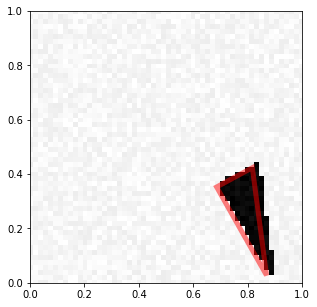

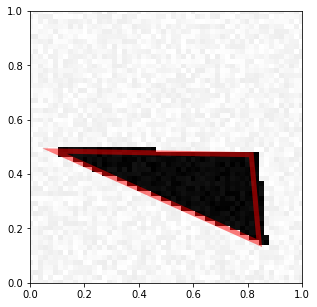

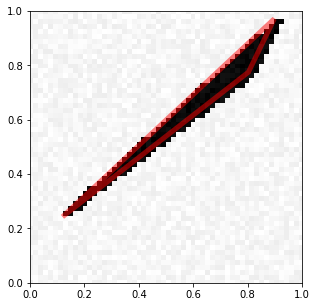

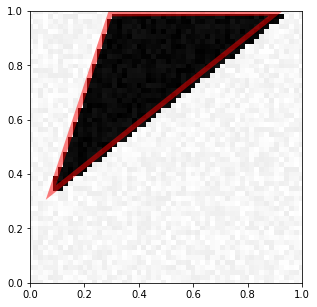

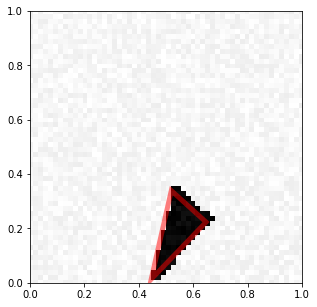

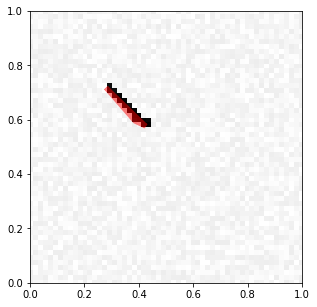

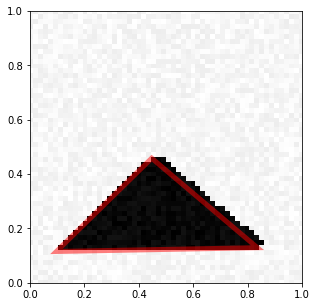

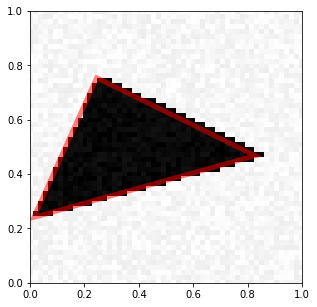

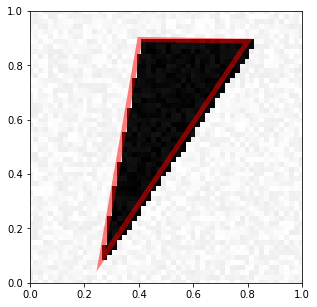

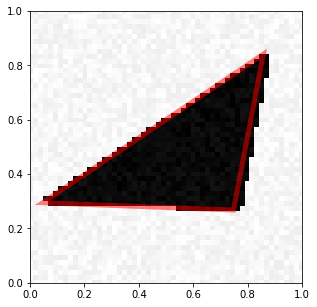

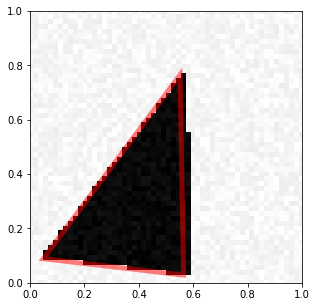

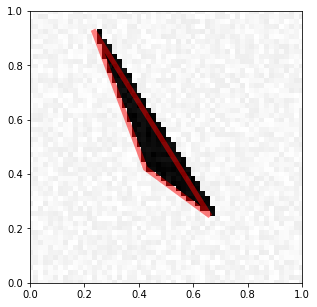

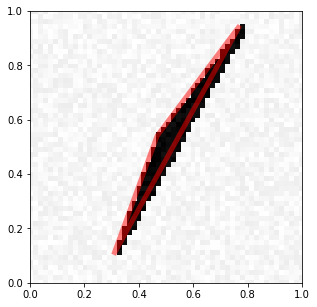

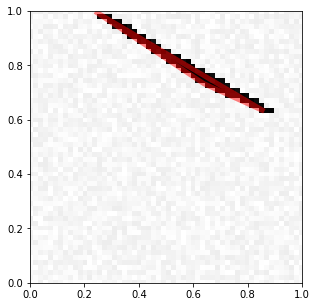

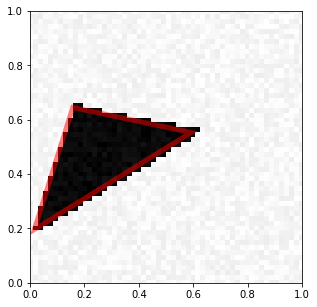

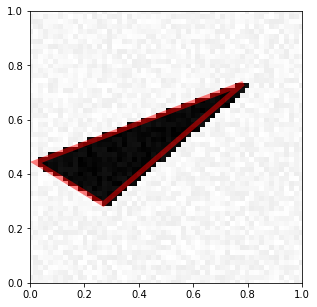

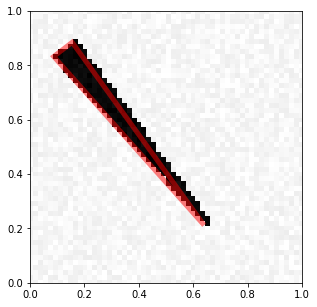

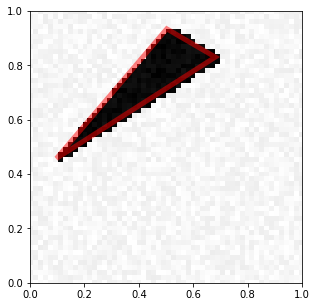

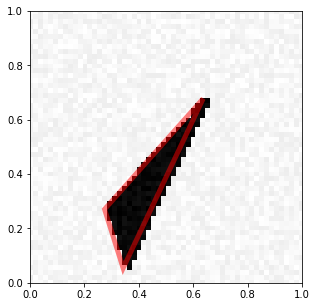

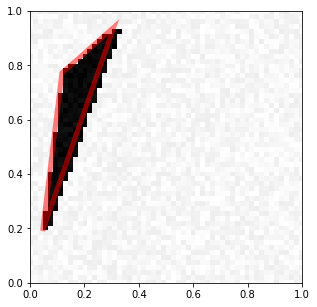

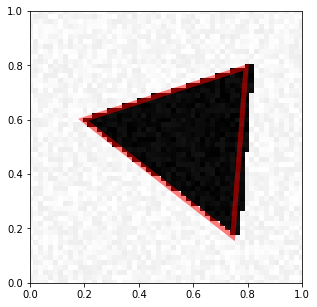

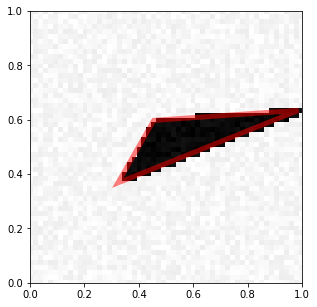

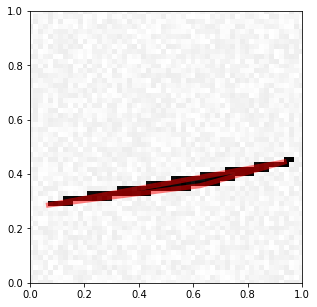

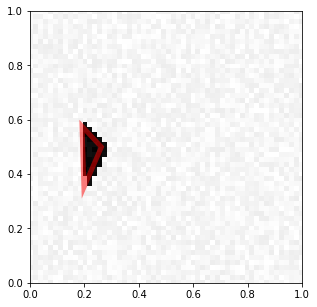

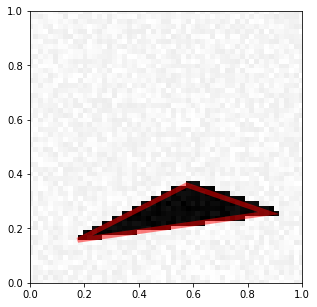

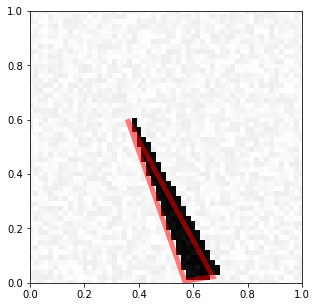

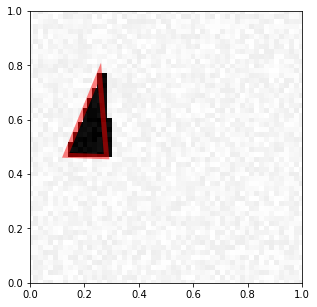

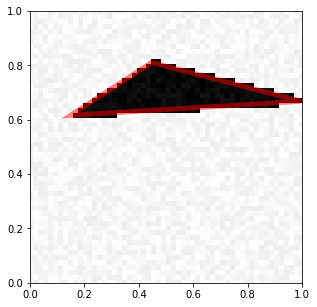

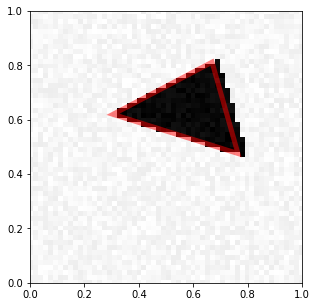

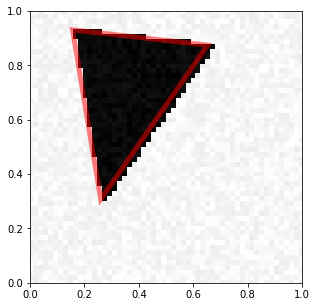

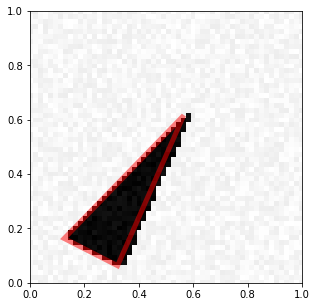

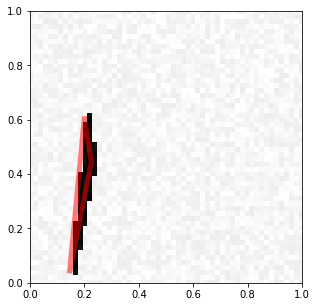

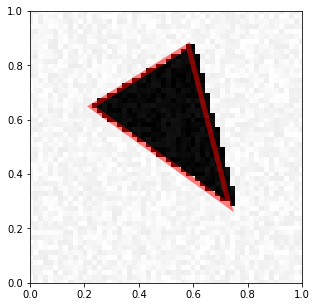

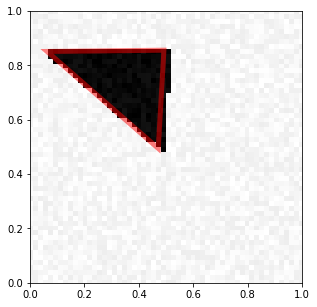

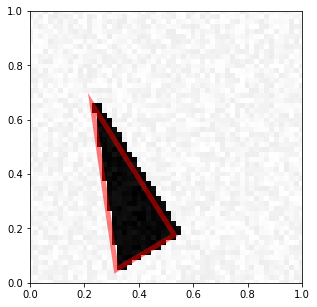

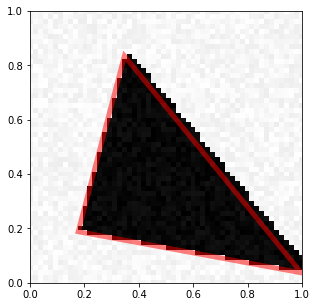

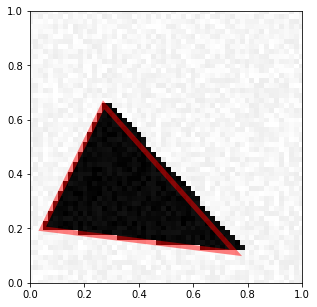

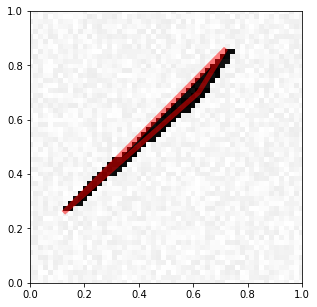

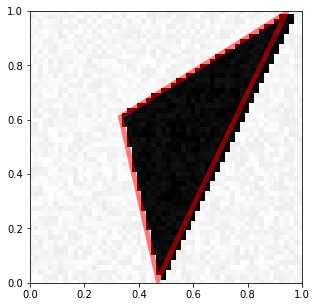

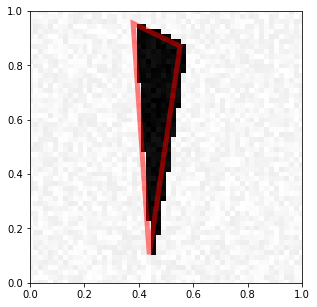

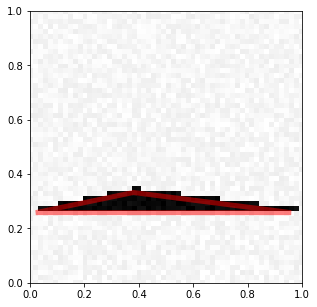

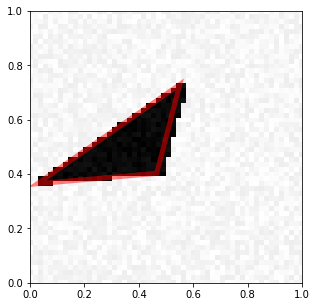

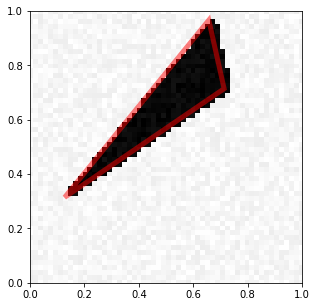

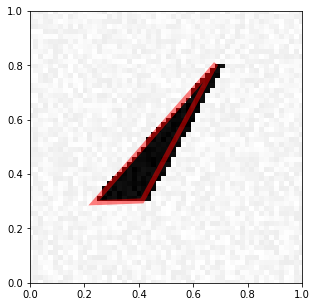

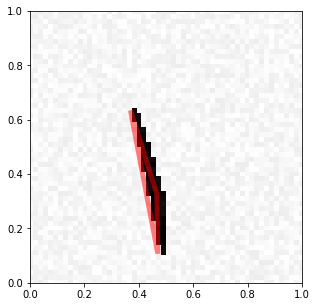

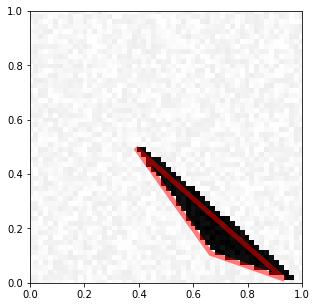

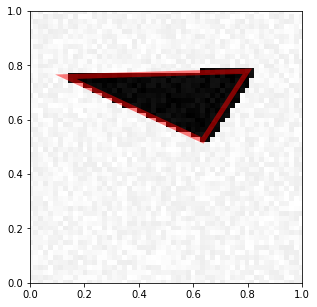

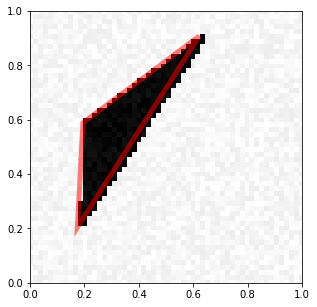

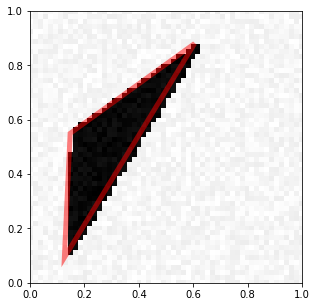

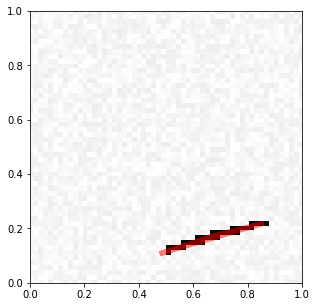

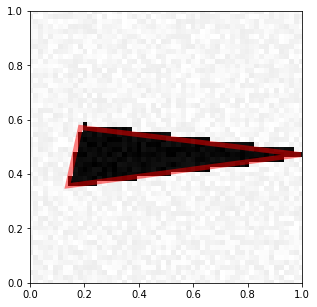

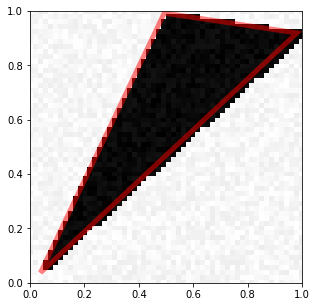

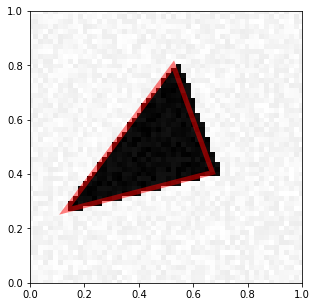

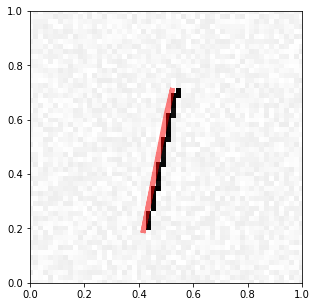

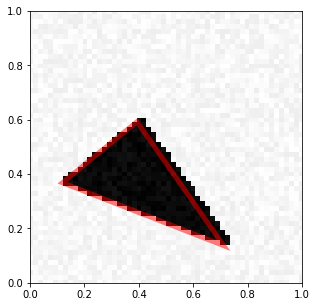

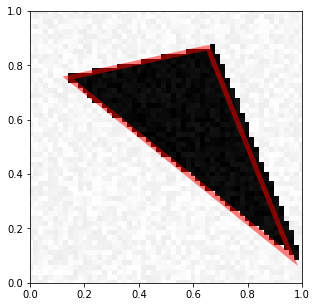

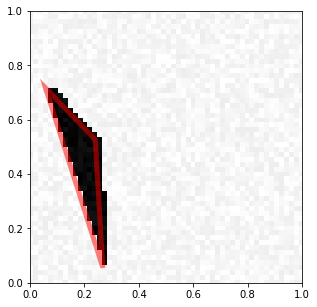

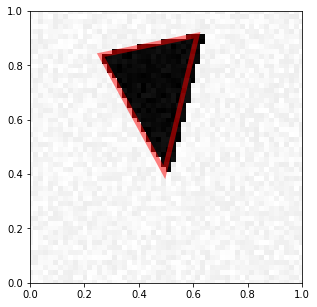

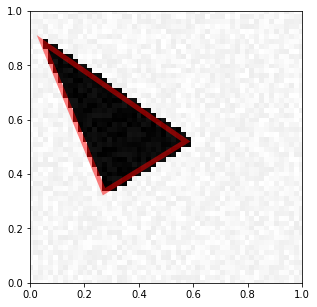

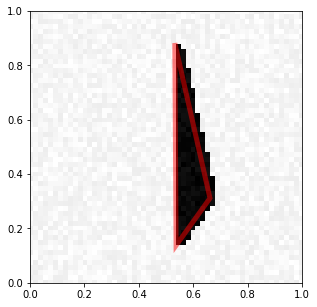

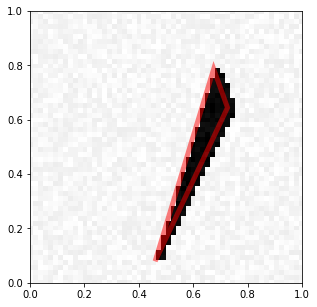

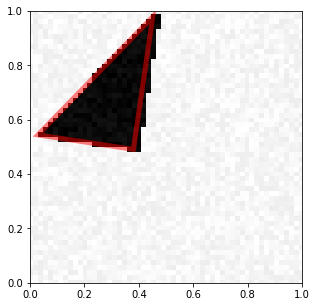

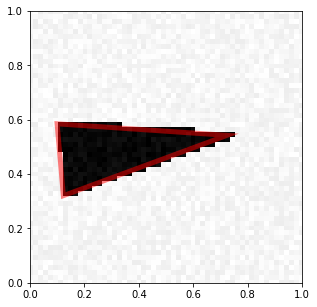

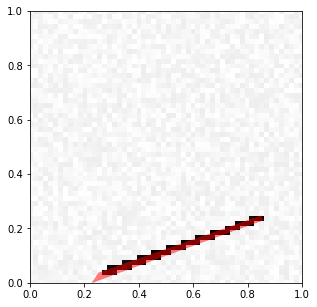

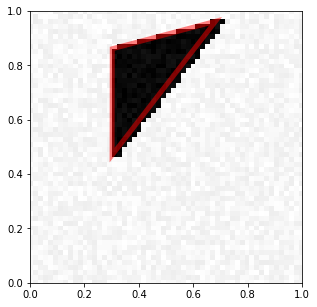

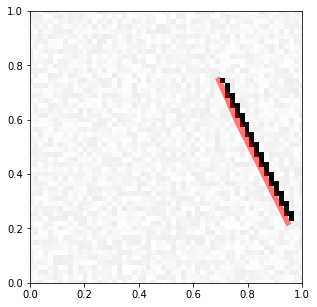

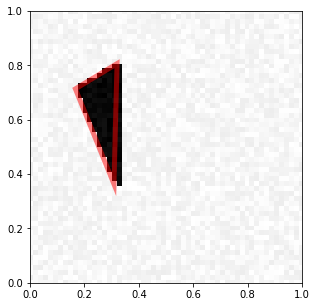

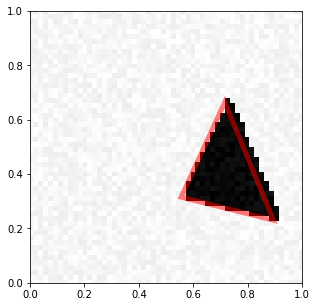

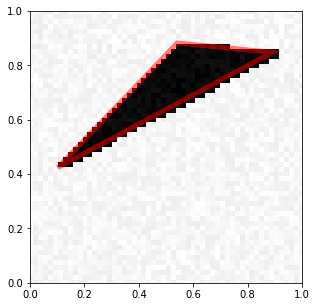

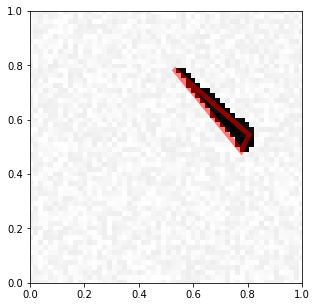

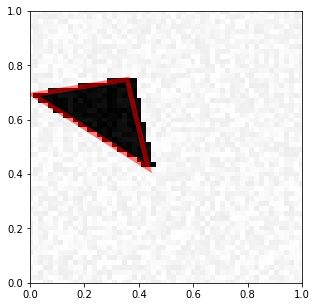

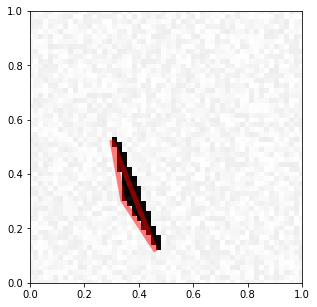

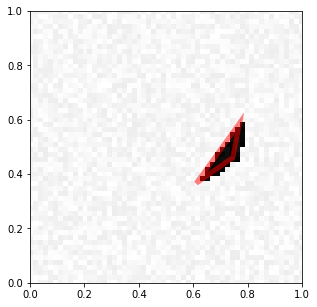

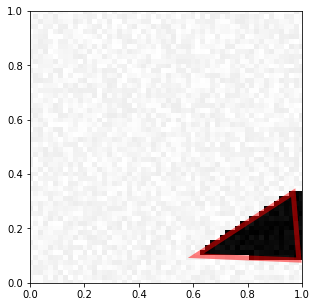

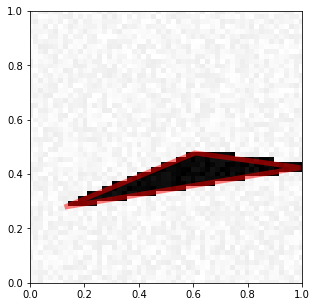

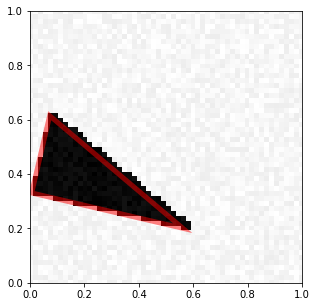

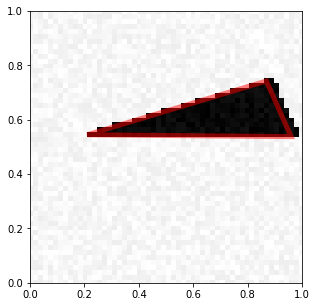

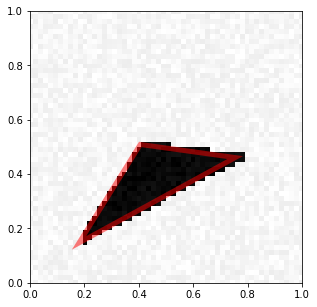

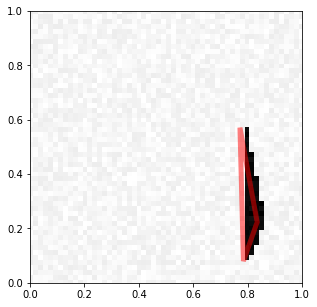

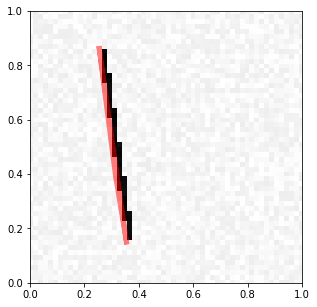

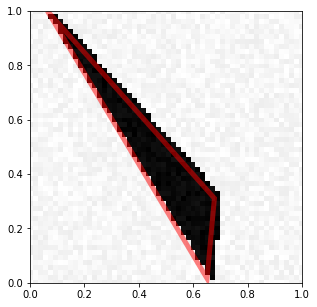

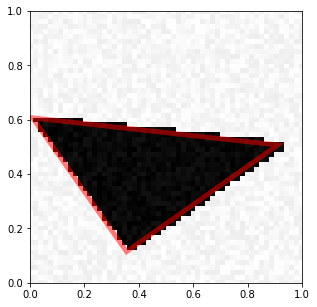

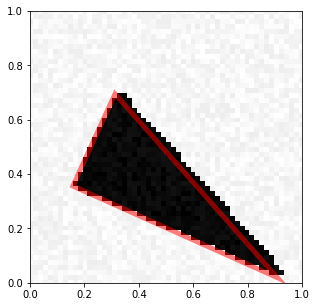

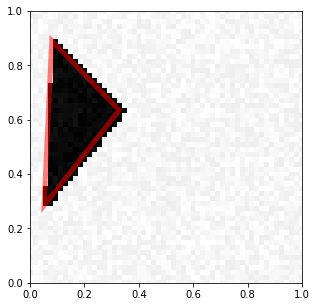

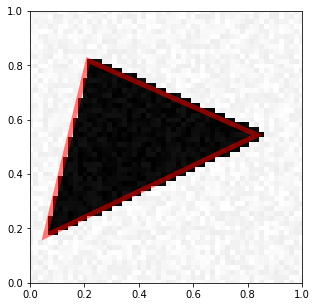

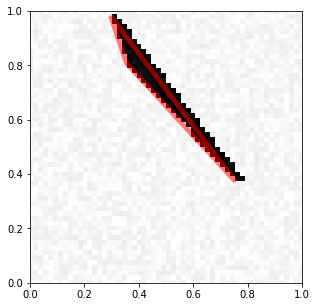

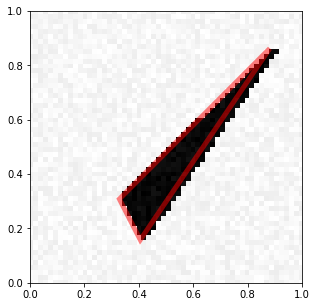

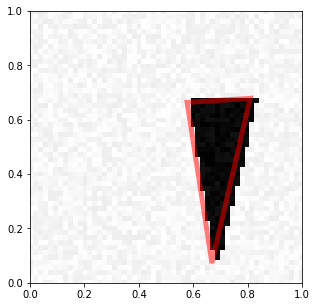

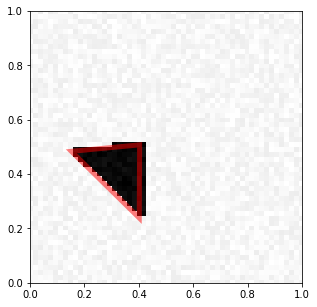

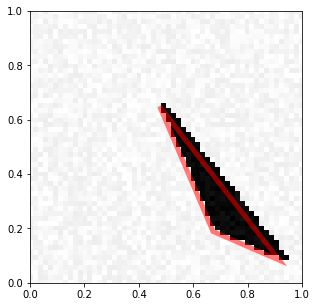

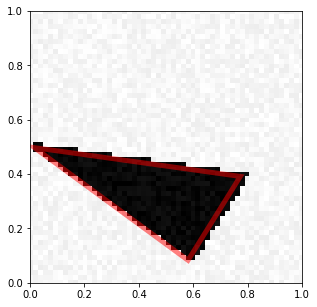

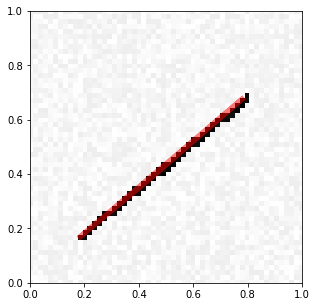

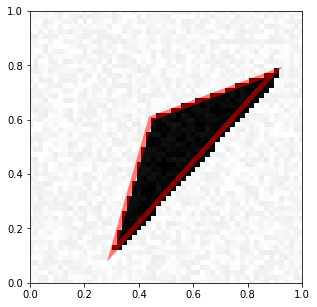

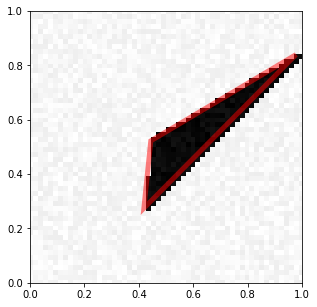

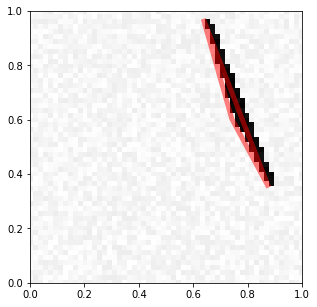

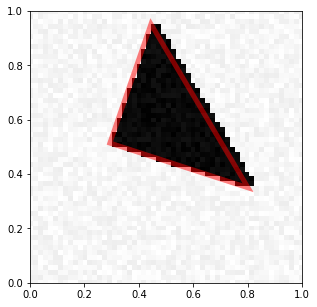

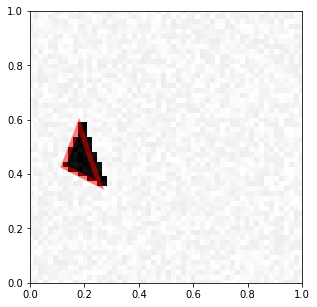

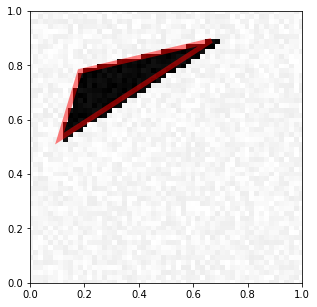

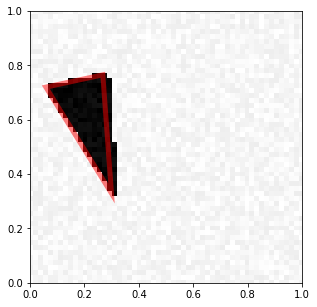

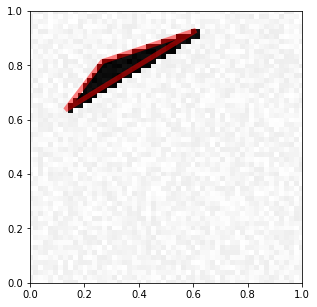

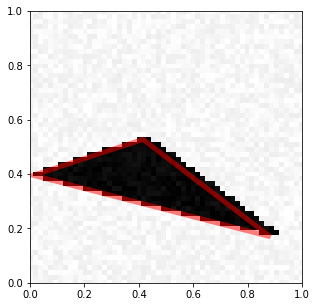

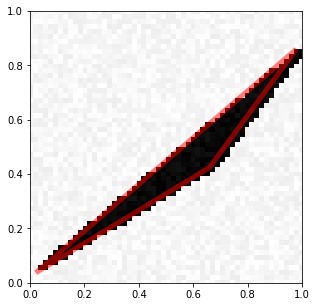

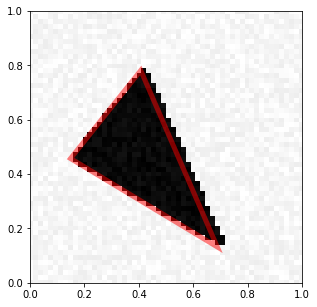

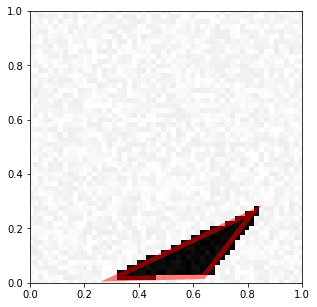

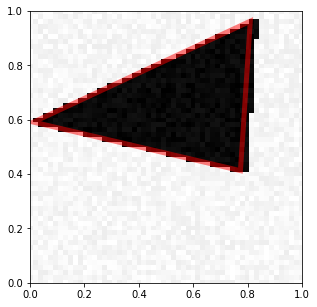

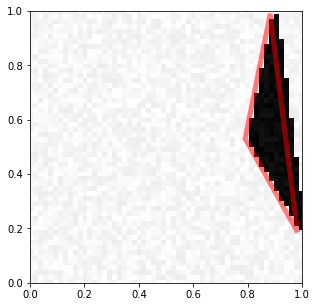

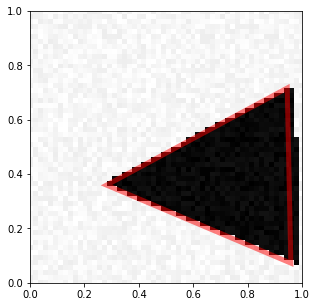

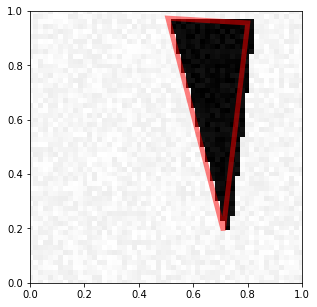

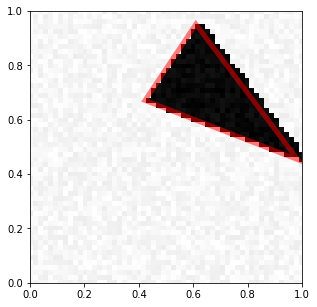

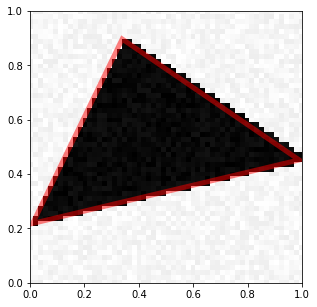

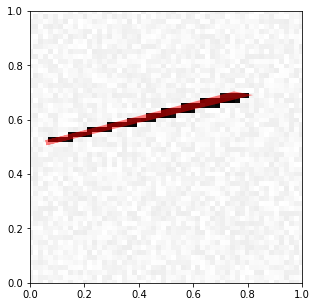

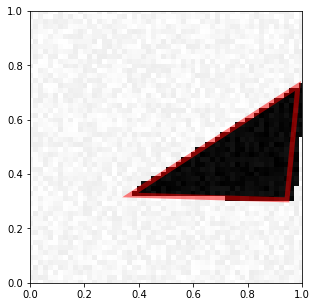

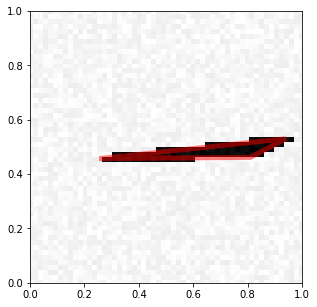

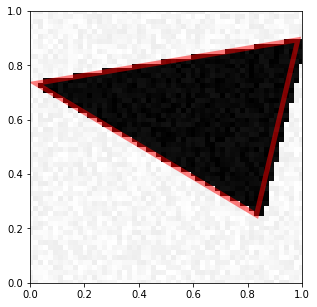

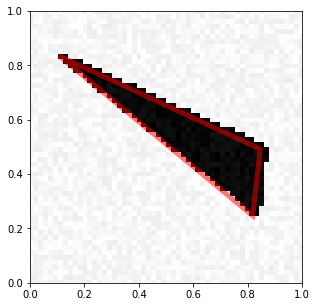

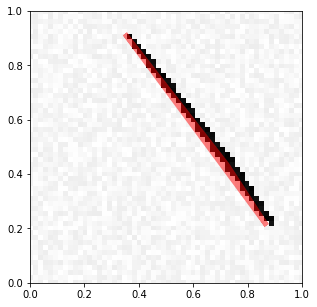

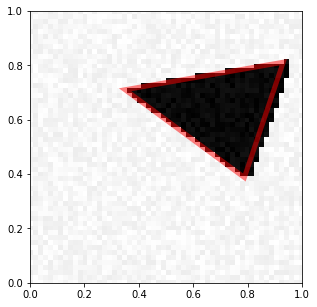

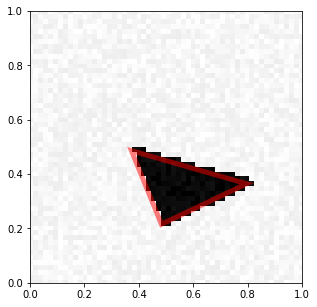

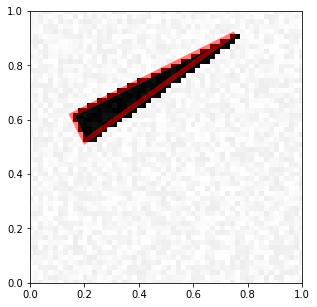

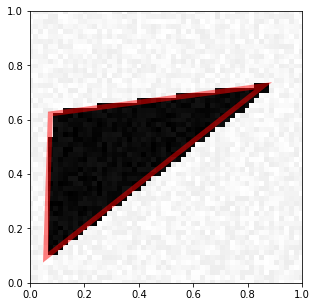

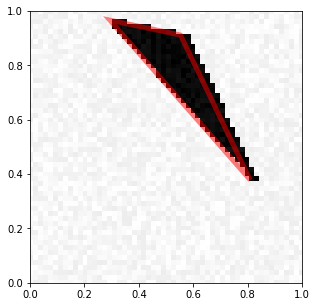

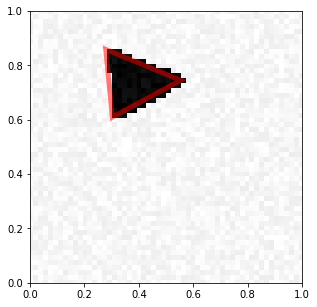

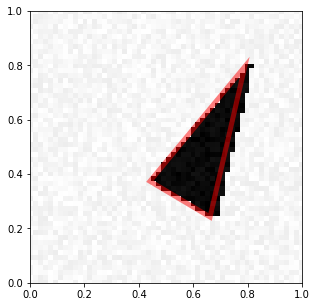

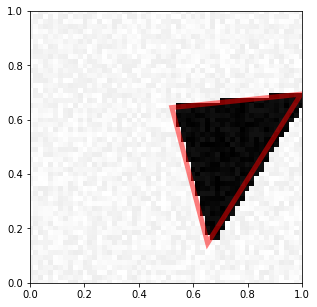

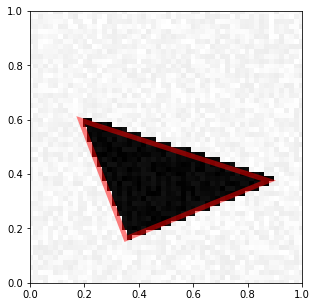

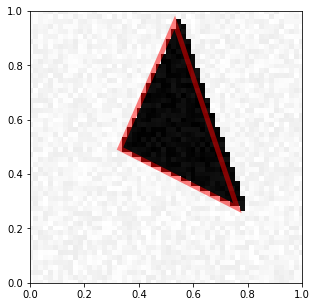

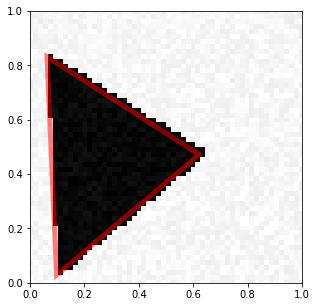

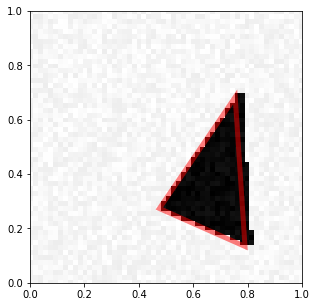

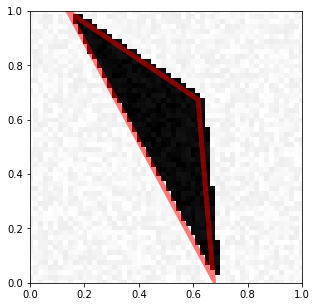

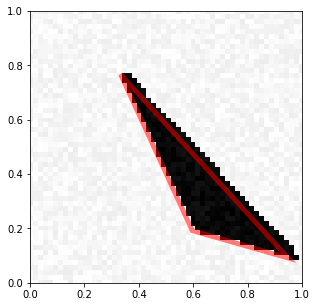

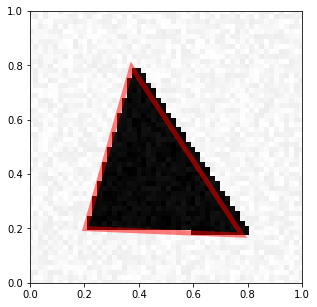

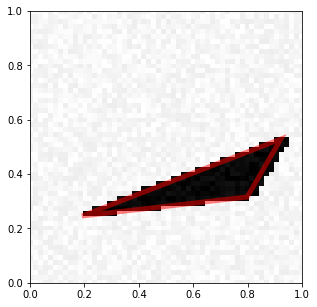

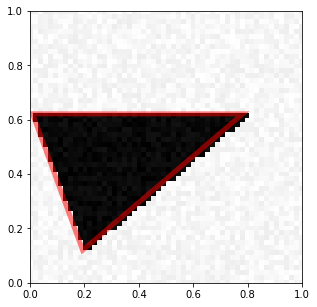

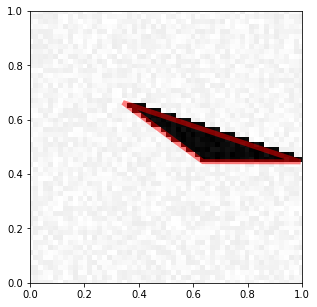

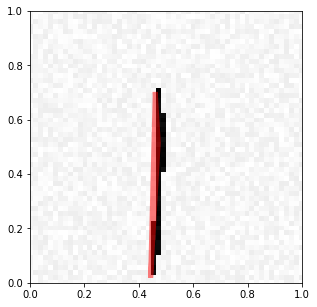

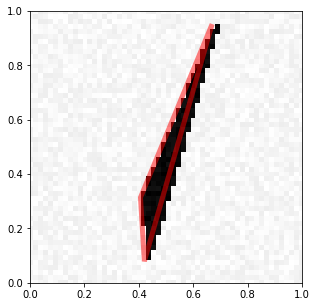

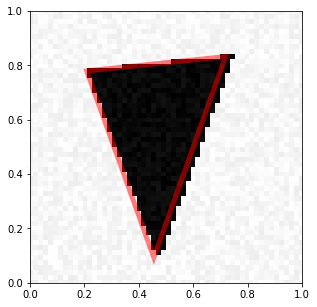

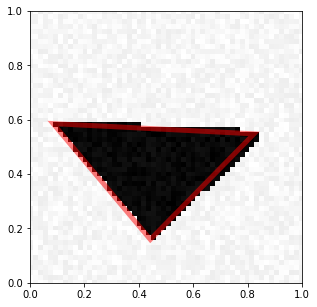

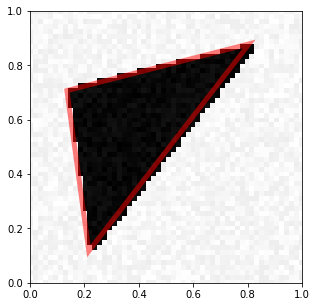

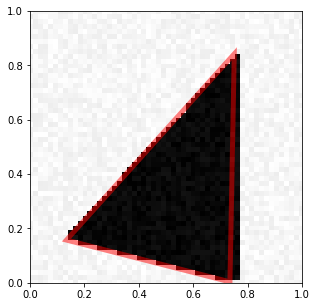

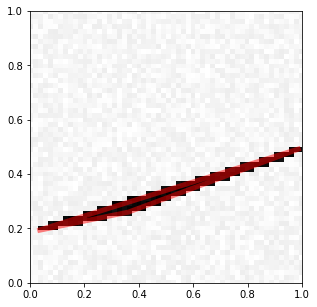

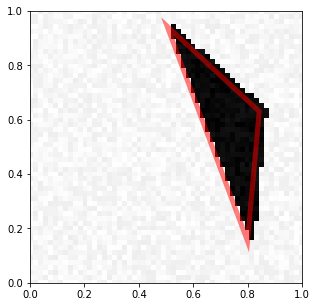

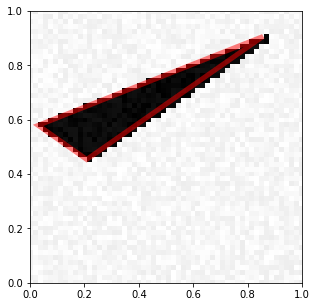

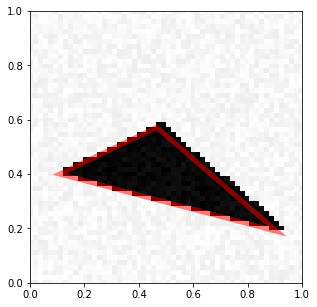

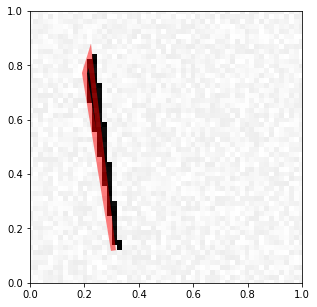

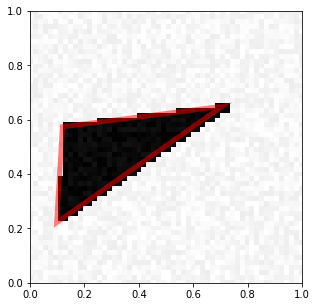

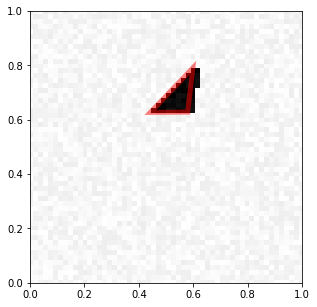

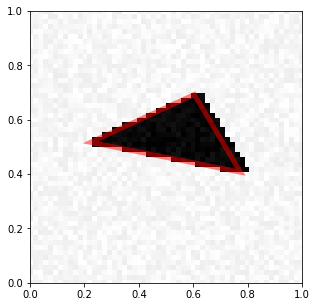

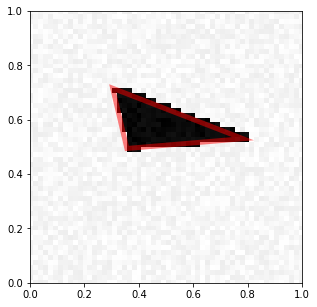

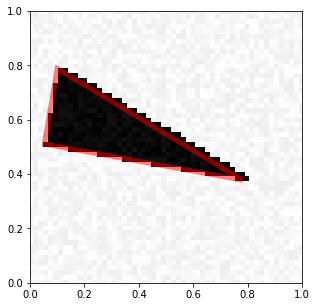

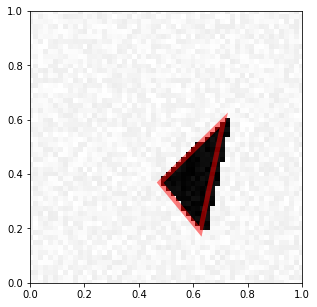

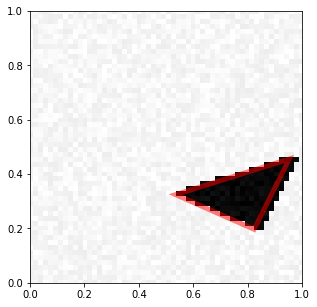

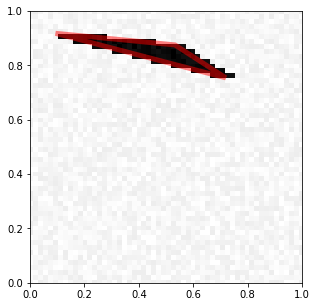

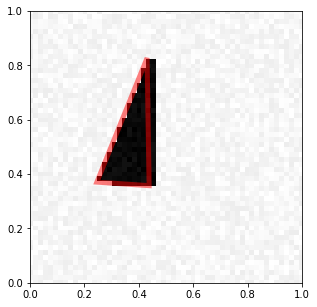

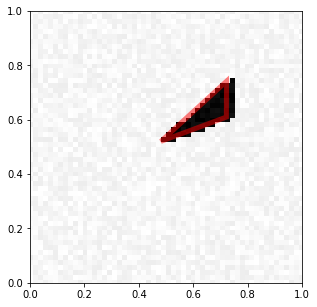

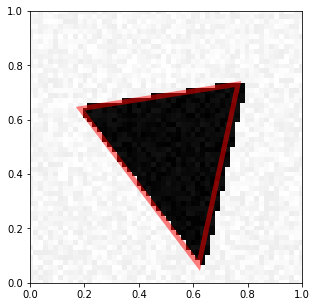

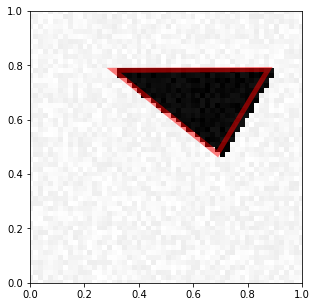

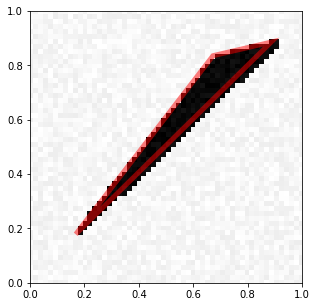

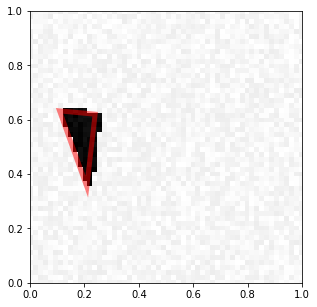

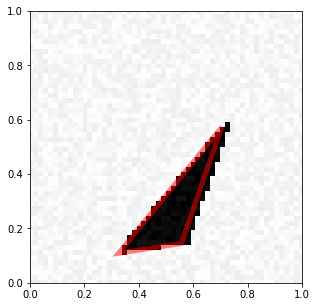

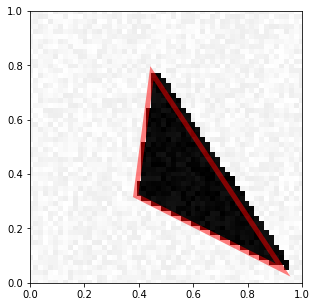

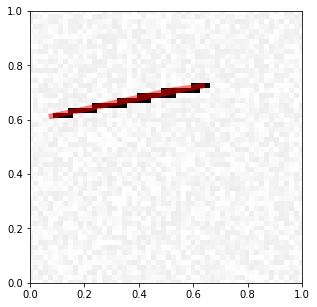

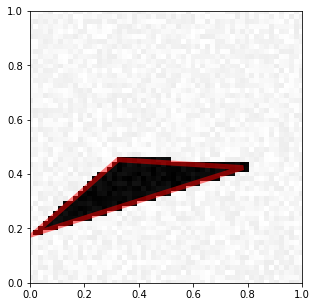

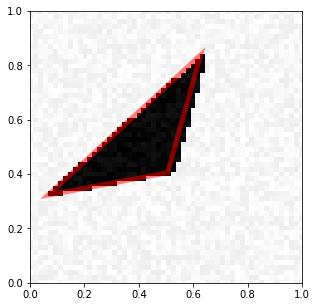

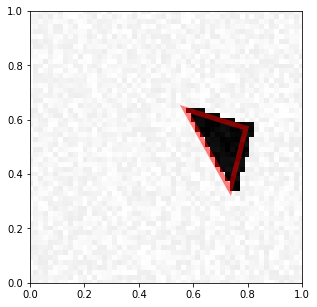

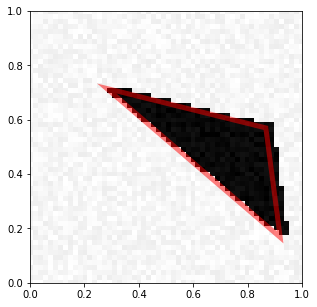

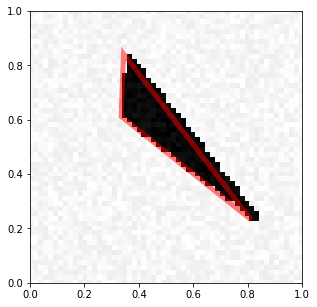

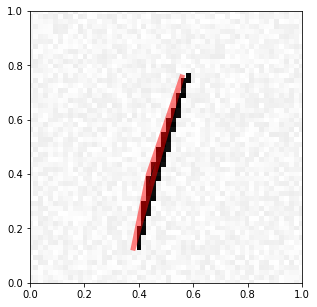

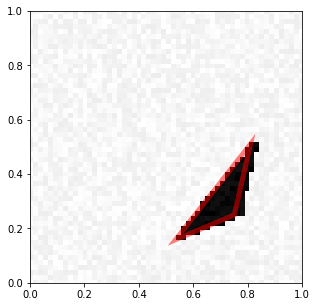

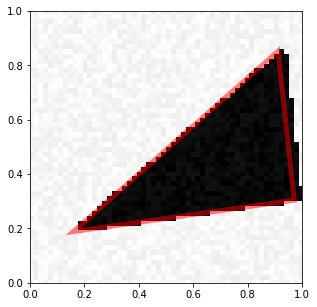

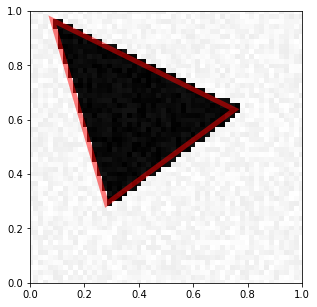

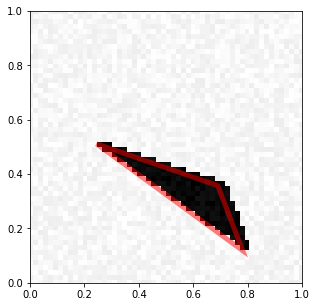

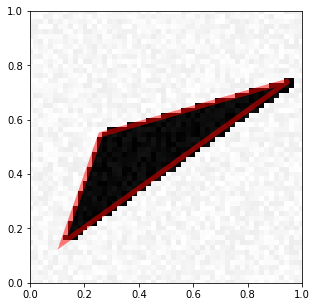

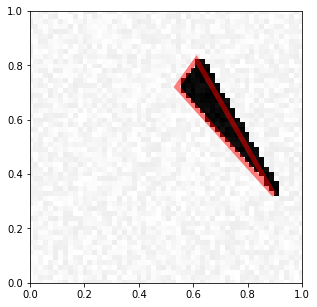

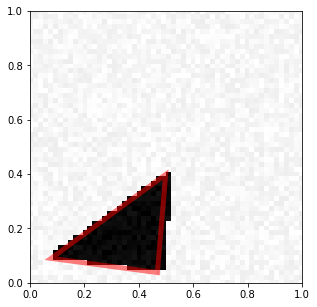

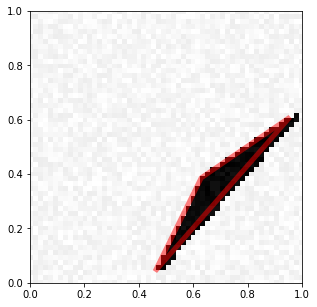

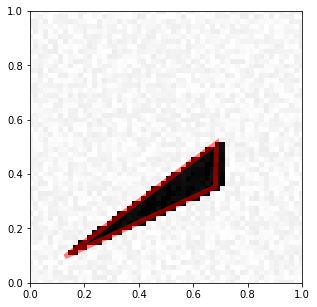

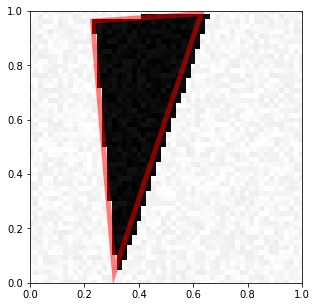

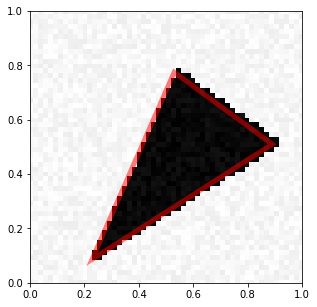

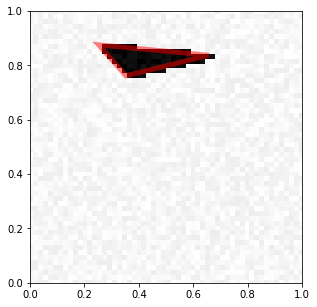

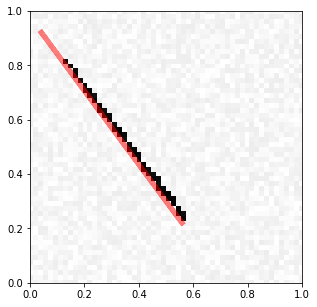

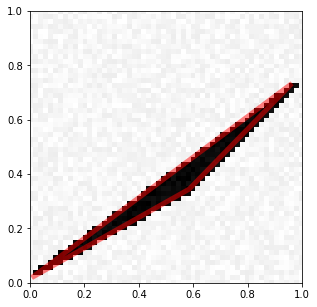

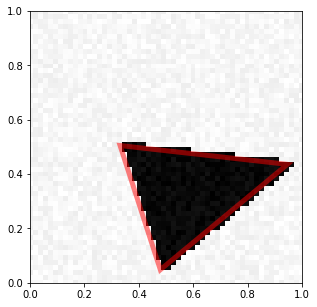

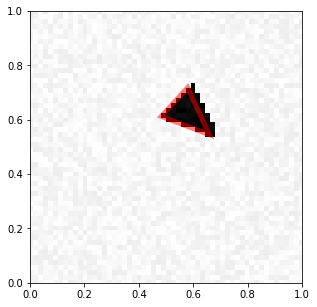

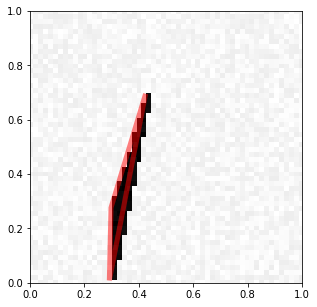

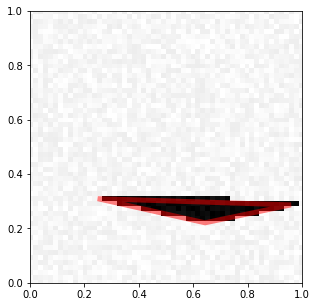

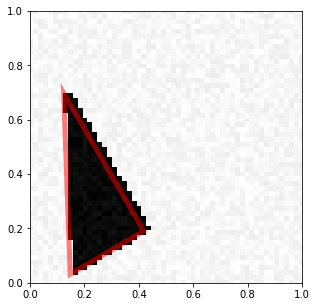

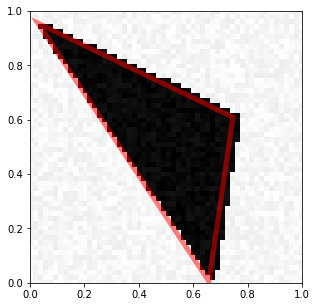

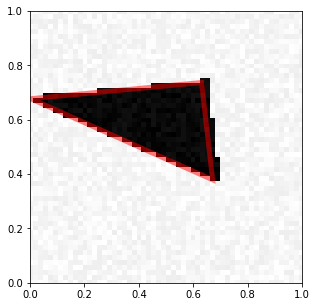

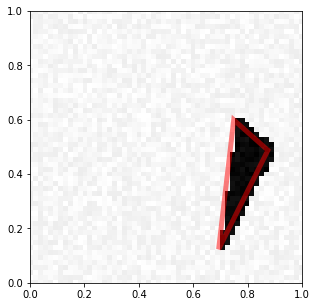

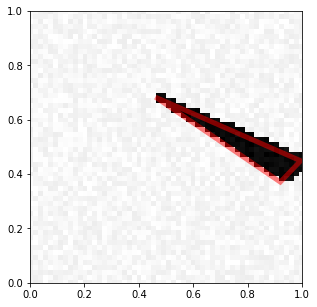

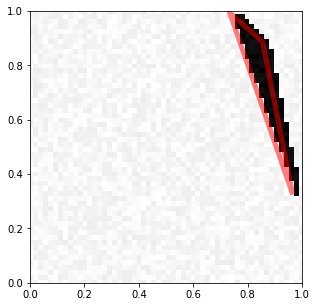

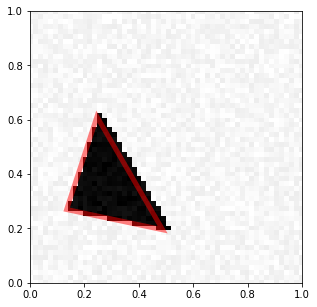

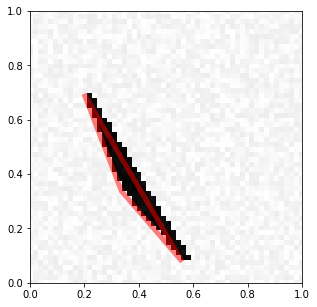

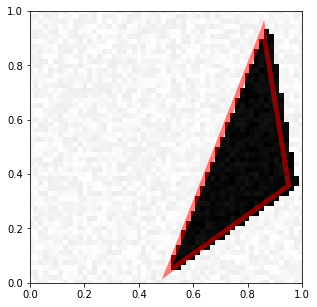

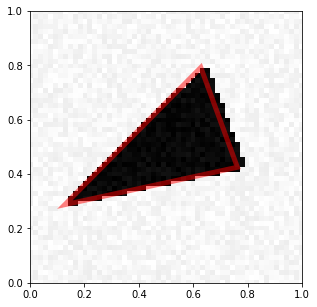

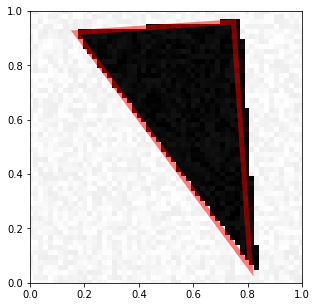

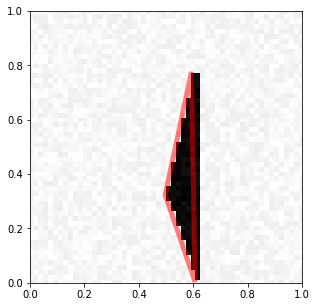

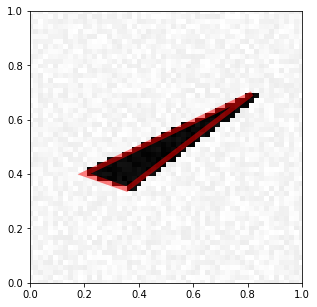

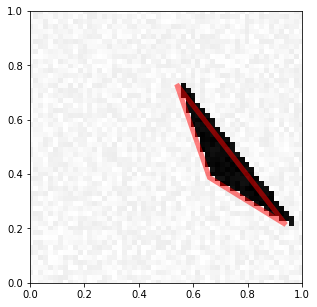

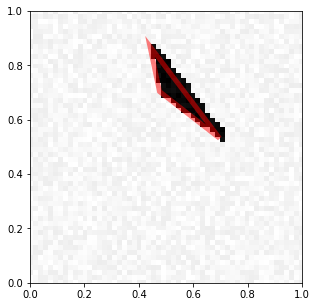

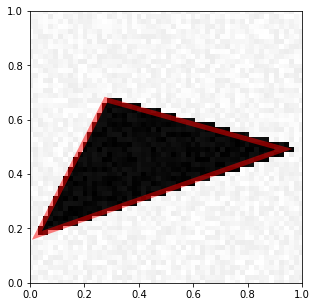

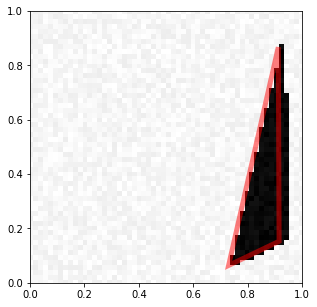

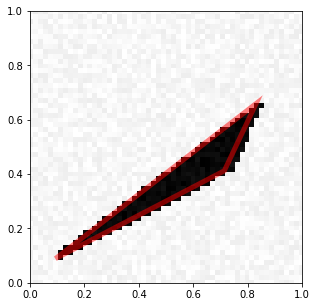

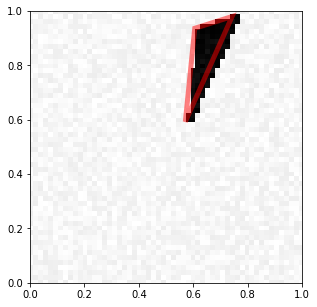

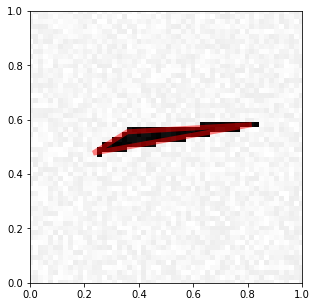

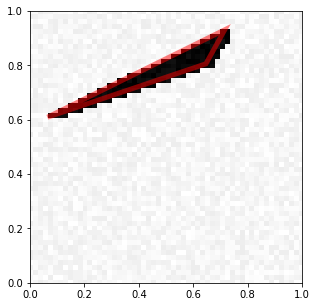

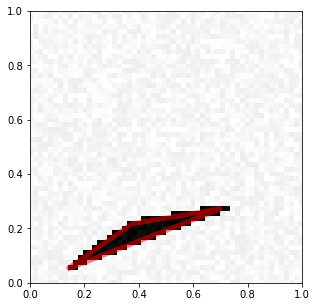

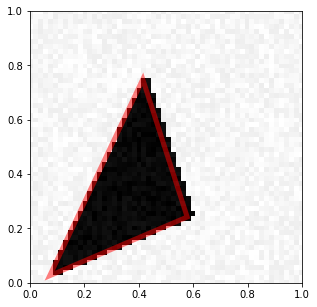

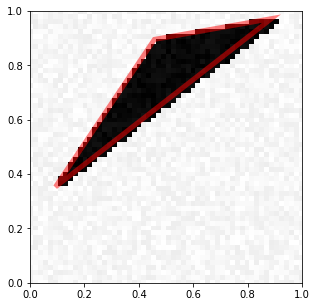

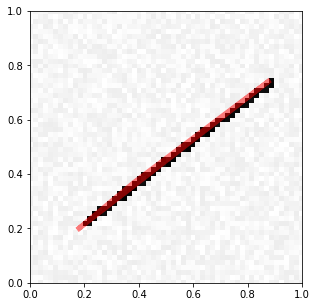

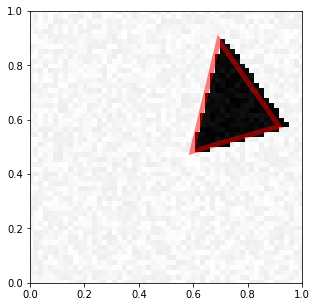

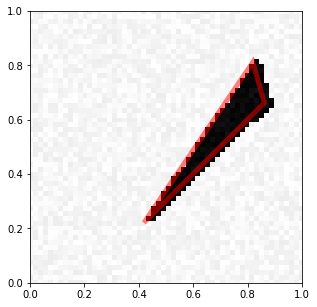

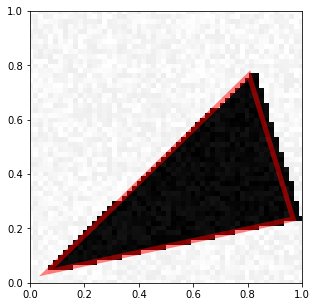

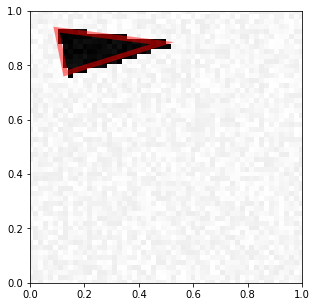

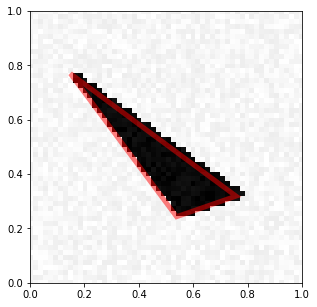

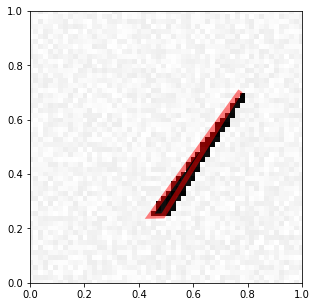

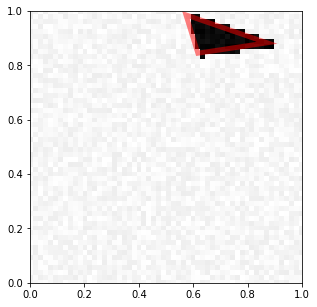

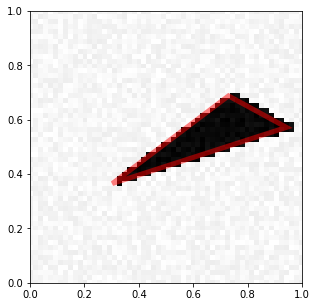

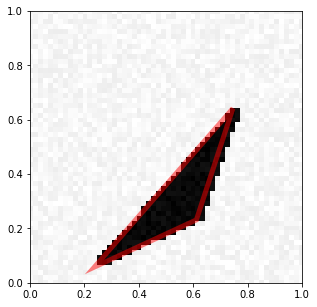

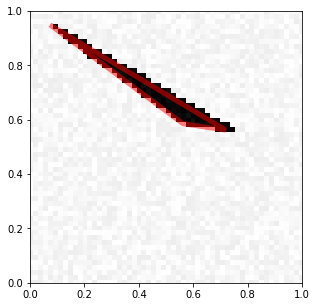

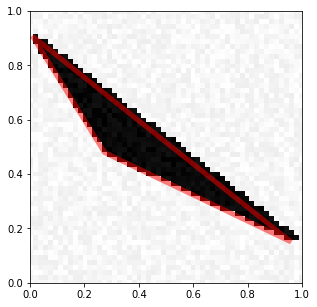

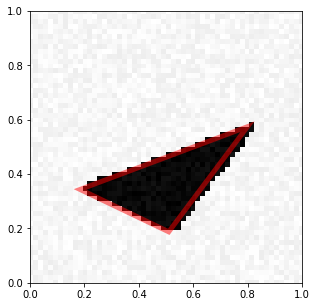

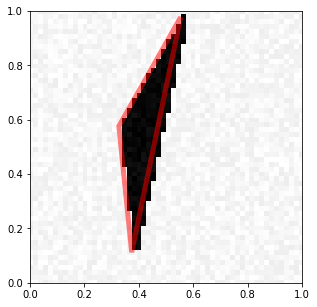

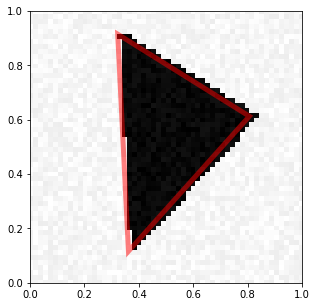

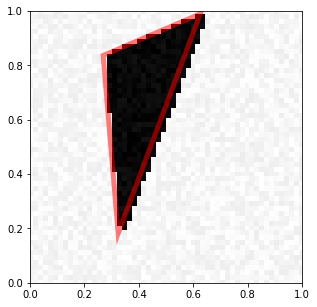

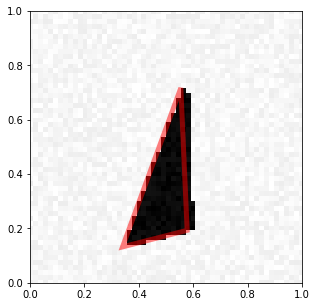

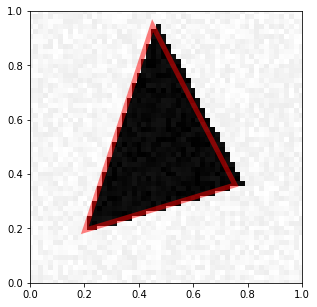

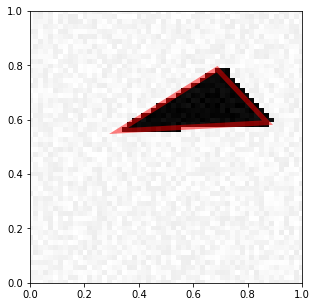

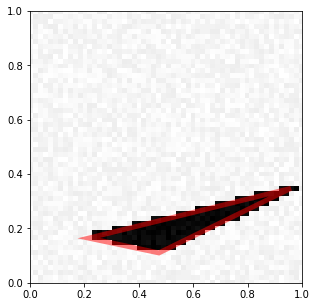

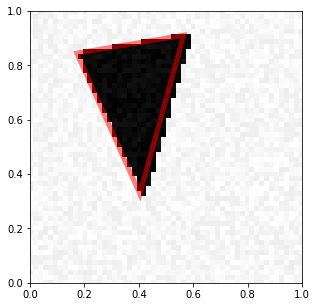

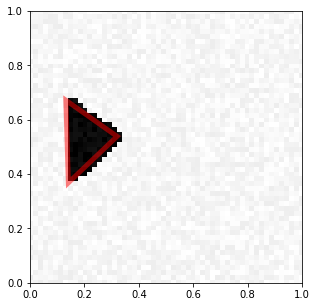

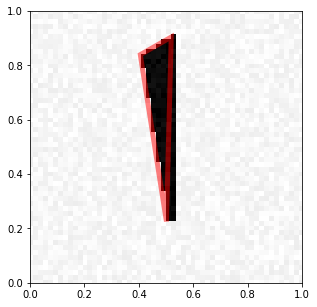

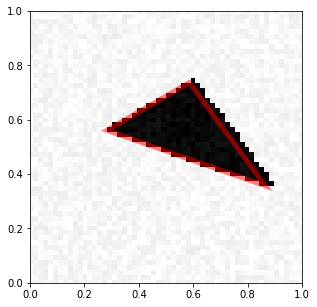

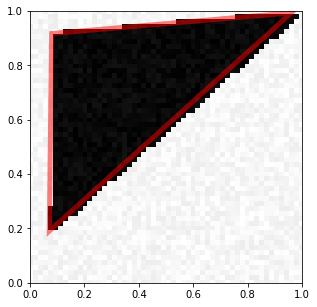

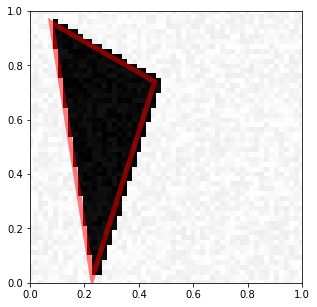

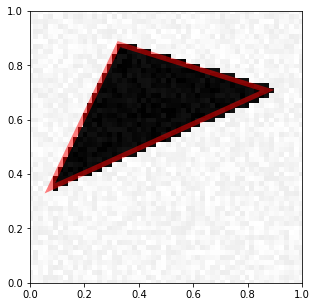

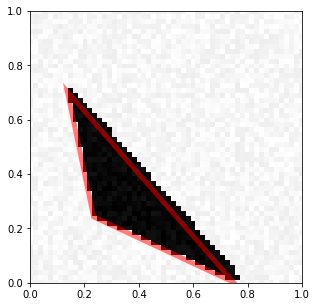

In [772]:
plt.figure(figsize=(10,10))
for i in range(300):
    plt.subplot(60,5,i+1)
    plt.xticks([]), plt.yticks([])
    visualize_prediction(X_train[i], Y_train[i])

In [773]:
X_train.shape

(300, 5184)

In [774]:
Y_train[1]#分别是三个点的坐标（x1,y1,x2,y2,x3,y3）

array([0.45803212, 0.09377698, 0.5897701 , 0.4675181 , 0.05955469,
       0.72586894])

In [775]:
#训练数据集：零均值单位方差
from sklearn import preprocessing
X_train_scale = preprocessing.scale(X_train)

Y_train_scale = preprocessing.scale(Y_train)

Y_train_nor = preprocessing.normalize(Y_train)

In [776]:
X_train_scale

array([[ 1.0688814 ,  0.00704286, -1.26974293, ...,  0.35077677,
        -0.53484537, -0.7347986 ],
       [ 1.43144772,  0.66345522,  0.47239377, ..., -0.20709861,
         0.59826204, -0.38998637],
       [-0.89526099, -1.63457118,  0.23379806, ..., -1.38603407,
        -0.66286253, -0.5506248 ],
       ...,
       [-1.07499458, -1.14062647, -0.9624655 , ..., -0.21217891,
         1.34176039, -1.1781598 ],
       [-1.22374645,  1.04134532,  0.47092097, ...,  1.60497781,
        -1.49106511,  1.04490663],
       [-1.06503716, -0.16660263, -1.38637377, ...,  1.24583811,
         0.78938841, -0.3300102 ]])

In [777]:
Y_train_nor

array([[0.4349208 , 0.55583934, 0.19289122, 0.5897884 , 0.34148898,
        0.01464314],
       [0.39935892, 0.0817643 , 0.51422147, 0.40762976, 0.05192582,
        0.63288626],
       [0.08114978, 0.53561436, 0.07236104, 0.11366508, 0.74574787,
        0.36364297],
       ...,
       [0.05877399, 0.72704739, 0.34838478, 0.56221342, 0.17401092,
        0.01456137],
       [0.5795383 , 0.47030316, 0.04826171, 0.23072627, 0.21706163,
        0.58332731],
       [0.68687188, 0.0020349 , 0.21473303, 0.22266544, 0.12600562,
        0.64547292]])

In [778]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(5184,)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [779]:
# choose loss function and optimizing method
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

In [780]:
# training
model.fit(X_train_scale, Y_train_nor, epochs=5)


Epoch 1/5
300/300 [==============================] - 1s 4ms/step - loss: 0.1382 - acc: 0.1800
Epoch 2/5
300/300 [==============================] - 0s 613us/step - loss: 0.1381 - acc: 0.3033
Epoch 3/5
300/300 [==============================] - 0s 626us/step - loss: 0.1318 - acc: 0.3767
Epoch 4/5
300/300 [==============================] - 0s 650us/step - loss: 0.1305 - acc: 0.4000
Epoch 5/5
300/300 [==============================] - 0s 640us/step - loss: 0.1305 - acc: 0.3867


In [781]:
[X_test, Y_test] = generate_test_set_regression()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [782]:
# test
print('\nTesting ------------')
cost = model.evaluate(X_test, Y_test, batch_size=32)
print('test cost:', cost)


Testing ------------
300/300 [==============================] - 0s 2ms/step
test cost: [0.19514850119749705, 0.24000000019868215]


In [783]:
 #7 Image Denoising
    #加噪音
import skimage
def generate_a_rectangle_noise(noise=0.0, free_location=False):#生成一个四边形
    image1 = generate_a_rectangle(noise=0.0, free_location=False)
    image2 = skimage.util.random_noise(image1, mode='salt')
    image2 = skimage.util.random_noise(image2, mode='pepper')
    #image = skimage.util.random_noise(image, mode='localvar', seed=None, clip=True,)
    return image1, image2

In [784]:
def generate_a_disk_noise(noise=0.0, free_location=False):
    image1 = generate_a_disk(noise=0.0, free_location=False)
    image2 = skimage.util.random_noise(image1, mode='salt')
    image2 = skimage.util.random_noise(image2, mode='pepper')
    #image = skimage.util.random_noise(image, mode='localvar', seed=None, clip=True,)
    return [image1, image2]

In [785]:
def generate_a_triangle_noise(noise=0.0, free_location=False):
    [image1, v] = generate_a_triangle(noise=0.0, free_location=False)
    image2 = skimage.util.random_noise(image1, mode='salt')
    image2 = skimage.util.random_noise(image2, mode='pepper')
    #image = skimage.util.random_noise(image, mode='localvar', seed=None, clip=True,)
    return image1, image2

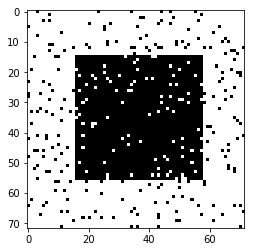

In [786]:
im1,im2 = generate_a_rectangle_noise(10, True)
plt.imshow(im1.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.imshow(im2.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

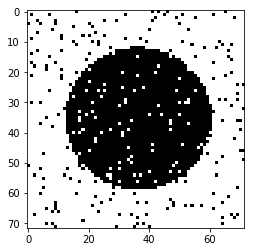

In [787]:
im1,im2 = generate_a_disk_noise(10)
plt.imshow(im1.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.imshow(im2.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

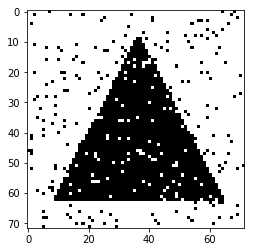

In [788]:
im1,im2 = generate_a_triangle_noise(20, False)
plt.imshow(im1.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.imshow(im2.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

In [789]:
def generate_dataset_classification_noise(nb_samples, noise=0.0, free_location=False):#生成的x是图形，y是标签
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X1 = np.zeros([nb_samples,im_size])
    X2 = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X1[i],X2[i] = generate_a_rectangle_noise(noise, free_location)
        elif category == 1: 
            X1[i],X2[i] = generate_a_disk_noise(noise, free_location)
        else:
            X1[i],X2[i] = generate_a_triangle_noise(noise, free_location)
        Y[i] = category#0是rectangle，1是disk，2是triangle
    #X = (X + noise) / (255 + 2 * noise)
    return [X1,X2,Y]

In [790]:
[X1_train,X2_train, Y_train] = generate_dataset_classification_noise(300, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [791]:
(train_images1, train_images2, train_labels)= [X1_train,X2_train, Y_train] 

In [792]:
train_images2.shape

(300, 5184)

In [793]:
train_img1 = np.zeros((300,72,72))
for i in range (300):
    train_img1[i] = np.reshape(train_images1[i],(72,72))
train_img2 = np.zeros((300,72,72))
for i in range (300):
    train_img2[i] = np.reshape(train_images2[i],(72,72))

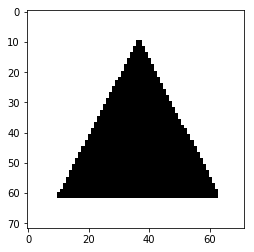

In [794]:
plt.imshow(train_img1[1], cmap='gray')

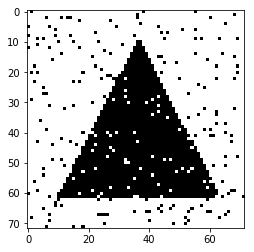

In [795]:
plt.imshow(train_img2[1], cmap='gray')

In [796]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(72,72)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(3, activation=tf.nn.softmax)
])


In [797]:
#Adam
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [798]:
model.fit(train_img1, train_labels, epochs=5)

Epoch 1/5
300/300 [==============================] - 1s 4ms/step - loss: 11.6050 - acc: 0.2800
Epoch 2/5
300/300 [==============================] - 0s 396us/step - loss: 11.6050 - acc: 0.2800
Epoch 3/5
300/300 [==============================] - 0s 386us/step - loss: 11.6050 - acc: 0.2800
Epoch 4/5
300/300 [==============================] - 0s 390us/step - loss: 11.6050 - acc: 0.2800
Epoch 5/5
300/300 [==============================] - 0s 380us/step - loss: 11.6050 - acc: 0.2800
